In [1]:
import pandas as pd

In [2]:
# Caminho para o arquivo JSON baixado
url_json_file = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [3]:
dados = pd.read_json(url_json_file);
dados

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [5]:
# Normalizar as tabelas, removendo colunas de informações dos clientes
normalized_dfs = []

# Normalizando a tabela principal (informações gerais do cliente)
main_df = dados.drop(columns=['customer', 'phone', 'internet', 'account'])
normalized_dfs.append(main_df)

# Normalizando a tabela de informações do cliente 'customer'
customer_df = pd.json_normalize(dados['customer'])
normalized_dfs.append(customer_df)

# Normalizando a tabela de informações do cliente 'phone'
phone_df = pd.json_normalize(dados['phone'])
normalized_dfs.append(phone_df)

# Normalizando a tabela de informações do cliente 'internet'
internet_df = pd.json_normalize(dados['internet'])
normalized_dfs.append(internet_df)

# Normalizando a tabela de informações do cliente 'account'
account_df = pd.json_normalize(dados['account'])
normalized_dfs.append(account_df)

# Agora 'normalized_dfs' contém uma lista de dataframes normalizados
normalized_dfs

[      customerID Churn
 0     0002-ORFBO    No
 1     0003-MKNFE    No
 2     0004-TLHLJ   Yes
 3     0011-IGKFF   Yes
 4     0013-EXCHZ   Yes
 ...          ...   ...
 7262  9987-LUTYD    No
 7263  9992-RRAMN   Yes
 7264  9992-UJOEL    No
 7265  9993-LHIEB    No
 7266  9995-HOTOH    No
 
 [7267 rows x 2 columns],
       gender  SeniorCitizen Partner Dependents  tenure
 0     Female              0     Yes        Yes       9
 1       Male              0      No         No       9
 2       Male              0      No         No       4
 3       Male              1     Yes         No      13
 4     Female              1     Yes         No       3
 ...      ...            ...     ...        ...     ...
 7262  Female              0      No         No      13
 7263    Male              0     Yes         No      22
 7264    Male              0      No         No       2
 7265    Male              0     Yes        Yes      67
 7266    Male              0     Yes        Yes      63
 
 [7267 row

In [6]:
# prompt: preciso que todas as colunas normalized_dfs fique alinhadas em uma única estrutura tabela

# Combinar todos os dataframes normalizados em um único dataframe
# Assumindo que os dataframes normalizados têm a mesma ordem de clientes/índice
# Você pode precisar de uma estratégia de junção mais robusta se os dados não estiverem alinhados
combined_df = pd.concat(normalized_dfs, axis=1)

# Exibir a tabela combinada
combined_df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [7]:
combined_df.info()

print("\n--- Tipos de Dados (dtypes) ---")
print(combined_df.dtypes)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


# Análise das Colunas do Dataset Telecom X

A seguir, apresento a relação entre as colunas do DataFrame processado, seus tipos de dados e as descrições obtidas do dicionário de dados, juntamente com uma análise inicial de relevância para o estudo da evasão (Churn).

## Descrição das Colunas e Tipos de Dados

1.  **customerID**
    *   Tipo: object
    *   Descrição: Número de identificação único de cada cliente.
    *   Relevância para Churn: Baixa (Identificador único, não preditivo por si só).
2.  **Churn**
    *   Tipo: object (Valores: 'Yes', 'No', Ausentes)
    *   Descrição: Se o cliente deixou ou não a empresa.
    *   Relevância para Churn: **Variável Alvo**. É a variável que queremos prever.
3.  **gender**
    *   Tipo: object
    *   Descrição: Gênero (masculino e feminino).
    *   Relevância para Churn: Média (Pode haver diferenças no comportamento de churn entre gêneros).
4.  **SeniorCitizen**
    *   Tipo: int64 (Valores: 0, 1)
    *   Descrição: Informação sobre um cliente ter ou não idade igual ou maior que 65 anos.
    *   Relevância para Churn: Média/Alta (Clientes mais velhos podem ter necessidades e comportamentos diferentes).
5.  **Partner**
    *   Tipo: object (Valores: 'Yes', 'No')
    *   Descrição: Se o cliente possui ou não um parceiro ou parceira.
    *   Relevância para Churn: Média (Status de relacionamento pode influenciar a decisão de churn).
6.  **Dependents**
    *   Tipo: object (Valores: 'Yes', 'No')
    *   Descrição: Se o cliente possui ou não dependentes.
    *   Relevância para Churn: Média (Presença de dependentes pode afetar a estabilidade e necessidades do cliente).
7.  **tenure**
    *   Tipo: int64
    *   Descrição: Meses de contrato do cliente.
    *   Relevância para Churn: **Alta** (Clientes com maior tempo de casa tendem a ser mais leais).
8.  **PhoneService**
    *   Tipo: object (Valores: 'Yes', 'No')
    *   Descrição: Assinatura de serviço telefônico.
    *   Relevância para Churn: Baixa/Média (Pode ser relevante em conjunto com outros serviços).
9.  **MultipleLines**
    *   Tipo: object (Valores: 'Yes', 'No', 'No phone service')
    *   Descrição: Assinatura de mais de uma linha de telefone.
    *   Relevância para Churn: Média (Pode indicar maior engajamento ou necessidades específicas).
10. **InternetService**
    *   Tipo: object (Valores: 'DSL', 'Fiber optic', 'No')
    *   Descrição: Assinatura de um provedor internet.
    *   Relevância para Churn: **Alta** (Qualidade e tipo do serviço de internet são fatores críticos de satisfação).
11. **OnlineSecurity**
    *   Tipo: object (Valores: 'Yes', 'No', 'No internet service')
    *   Descrição: Assinatura adicional de segurança online.
    *   Relevância para Churn: Média (Serviços adicionais podem aumentar o valor percebido e a retenção).
12. **OnlineBackup**
    *   Tipo: object (Valores: 'Yes', 'No', 'No internet service')
    *   Descrição: Assinatura adicional de backup online.
    *   Relevância para Churn: Média (Similar a OnlineSecurity).
13. **DeviceProtection**
    *   Tipo: object (Valores: 'Yes', 'No', 'No internet service')
    *   Descrição: Assinatura adicional de proteção no dispositivo.
    *   Relevância para Churn: Média (Similar a OnlineSecurity).
14. **TechSupport**
    *   Tipo: object (Valores: 'Yes', 'No', 'No internet service')
    *   Descrição: Assinatura adicional de suporte técnico.
    *   Relevância para Churn: **Alta** (Qualidade do suporte técnico é crucial para a satisfação do cliente).
15. **StreamingTV**
    *   Tipo: object (Valores: 'Yes', 'No', 'No internet service')
    *   Descrição: Assinatura de TV a cabo.
    *   Relevância para Churn: Média (Serviços de entretenimento podem influenciar a retenção).
16. **StreamingMovies**
    *   Tipo: object (Valores: 'Yes', 'No', 'No internet service')
    *   Descrição: Assinatura de streaming de filmes.
    *   Relevância para Churn: Média (Similar a StreamingTV).
17. **Contract**
    *   Tipo: object (Valores: 'Month-to-month', 'One year', 'Two year')
    *   Descrição: Tipo de contrato.
    *   Relevância para Churn: **Alta** (Contratos de longo prazo geralmente têm menor churn).
18. **PaperlessBilling**
    *   Tipo: object (Valores: 'Yes', 'No')
    *   Descrição: Se o cliente prefere receber online a fatura.
    *   Relevância para Churn: Baixa/Média (Pode indicar preferência por canais digitais).
19. **PaymentMethod**
    *   Tipo: object
    *   Descrição: Método de pagamento.
    *   Relevância para Churn: Média (Métodos automáticos podem ter menor churn).
20. **Charges.Monthly**
    *   Tipo: float64
    *   Descrição: Cobrança mensal.
    *   Relevância para Churn: **Alta** (Valor da fatura é um fator importante na decisão do cliente).
21. **Charges.Total**
    *   Tipo: float64 (Contém valores ausentes)
    *   Descrição: Cobrança total.
    *   Relevância para Churn: **Alta** (Relacionado ao `tenure` e `Charges.Monthly`, indica o valor total gasto pelo cliente).

## Identificação Preliminar de Colunas Relevantes para Análise de Evasão

Com base na descrição e no entendimento geral do negócio de telecomunicações, as seguintes colunas são consideradas particularmente relevantes para investigar os motivos da evasão de clientes:

*   **Churn**: A variável alvo que queremos entender e prever.
*   **tenure**: Tempo de permanência do cliente. Geralmente, quanto maior o tempo, menor a chance de churn.
*   **Contract**: Tipo de contrato. Contratos mensais tendem a ter maior churn que contratos anuais ou bienais.
*   **InternetService**: O tipo e a qualidade do serviço de internet são frequentemente fatores decisivos.
*   **TechSupport**: Acesso e qualidade do suporte técnico podem impactar significativamente a satisfação.
*   **Charges.Monthly**: O custo mensal do serviço é um fator primário na decisão de permanecer ou sair.
*   **Charges.Total**: Embora correlacionado com tenure e cobrança mensal, pode oferecer insights sobre o valor total do cliente.
*   **PaymentMethod**: Certos métodos de pagamento podem estar associados a diferentes perfis de churn.
*   **SeniorCitizen**: Idade pode influenciar as necessidades e a sensibilidade a preço.
*   **Serviços Adicionais (OnlineSecurity, OnlineBackup, DeviceProtection, StreamingTV, StreamingMovies)**: A adesão (ou falta de adesão) a esses serviços pode indicar o nível de engajamento do cliente com a empresa.

Esta é uma análise inicial. A análise exploratória de dados (EDA) e a modelagem subsequente ajudarão a confirmar e quantificar a importância de cada uma dessas variáveis.


# Dicionário de Dados - Telecom X

*   **customerID**: número de identificação único de cada cliente
*   **Churn**: se o cliente deixou ou não a empresa (Variável Alvo)
*   **gender**: gênero (masculino e feminino)
*   **SeniorCitizen**: informação sobre um cliente ter ou não idade igual ou maior que 65 anos (1 = Sim, 0 = Não)
*   **Partner**: se o cliente possui ou não um parceiro ou parceira
*   **Dependents**: se o cliente possui ou não dependentes
*   **tenure**: meses de contrato do cliente
*   **PhoneService**: assinatura de serviço telefônico
*   **MultipleLines**: assinatura de mais de uma linha de telefone
*   **InternetService**: assinatura de um provedor internet (DSL, Fibra óptica, Não)
*   **OnlineSecurity**: assinatura adicional de segurança online
*   **OnlineBackup**: assinatura adicional de backup online
*   **DeviceProtection**: assinatura adicional de proteção no dispositivo
*   **TechSupport**: assinatura adicional de suporte técnico, menos tempo de espera
*   **StreamingTV**: assinatura de TV a cabo
*   **StreamingMovies**: assinatura de streaming de filmes
*   **Contract**: tipo de contrato (Mensal, Anual, Dois anos)
*   **PaperlessBilling**: se o cliente prefere receber online a fatura
*   **PaymentMethod**: método de pagamento
*   **Charges.Monthly**: cobrança mensal
*   **Charges.Total**: cobrança total


In [8]:
combined_df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [9]:
print("--- Verificação de Qualidade de Dados: Passo 1 ---")

# 1. Verificar Valores Ausentes
print("\n1. Valores Ausentes por Coluna:")
missing_values = combined_df.isnull().sum()
missing_percent = (missing_values / len(combined_df)) * 100
missing_df = pd.DataFrame({
    'Contagem Ausentes': missing_values,
    'Percentual Ausentes (%)': missing_percent
})
# Filtrar para mostrar apenas colunas com valores ausentes
missing_df_filtered = missing_df[missing_df['Contagem Ausentes'] > 0]
if not missing_df_filtered.empty:
    print(missing_df_filtered.round(2).to_markdown())
else:
    print("Nenhum valor ausente encontrado.")

# 2. Verificar Linhas Duplicadas
print("\n2. Verificação de Linhas Duplicadas:")
duplicate_rows = combined_df.duplicated().sum()
if duplicate_rows > 0:
    print(f"Encontradas {duplicate_rows} linhas duplicadas no dataset.")
    # Opcional: mostrar as linhas duplicadas (pode ser extenso)
    # print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).to_markdown())
else:
    print("Nenhuma linha duplicada encontrada.")

--- Verificação de Qualidade de Dados: Passo 1 ---

1. Valores Ausentes por Coluna:
Nenhum valor ausente encontrado.

2. Verificação de Linhas Duplicadas:
Nenhuma linha duplicada encontrada.


In [22]:
import pandas as pd
import numpy as np # Import numpy

# ... (rest of your code)

print("--- Verificação de Qualidade de Dados: Passo 2 ---")

# 1. Identificar Colunas Categóricas (tipo 'object')
categorical_cols = combined_df.select_dtypes(include=["object"]).columns
# Excluir 'customerID' que é um identificador único
if "customerID" in categorical_cols:
    categorical_cols = categorical_cols.drop("customerID")

print("\n1. Análise de Valores Únicos em Colunas Categóricas:")
inconsistencies_found = False
all_unique_values = {} # Store unique values for later analysis

for col in categorical_cols:
    # Handle potential NaN values before calling unique() if necessary,
    # although unique() handles NaN correctly.
    # Fillna temporarily for analysis if needed, but unique() is usually fine.
    # Use 'combined_df' instead of 'df'
    unique_values = combined_df[col].unique()
    all_unique_values[col] = unique_values # Store for step 3
    print(f"\nColuna: {col}")
    print(f"  Valores Únicos ({len(unique_values)}): {unique_values}")

    # Verificações específicas de inconsistência
    # Check Churn values
    if col == "Churn":
        # Expected values are 'Yes', 'No', and NaN/None variations
        # Create a set of unique non-null values found
        unique_set_no_na = {x for x in unique_values if pd.notna(x)}
        expected_set_no_na = {"Yes", "No"}
        unexpected_values = unique_set_no_na - expected_set_no_na
        if unexpected_values:
            print(f"  >> Alerta: Valores inesperados encontrados em Churn: {unexpected_values}")
            inconsistencies_found = True

    # Check for leading/trailing spaces in string values
    for val in unique_values:
        if isinstance(val, str) and (val.strip() != val):
            print(f"  >> Alerta: Valor \'{val}\' na coluna {col} possui espaços extras.")
            inconsistencies_found = True
        # Check for empty strings "" which might be problematic
        if isinstance(val, str) and val == "":
              print(f"  >> Alerta: Valor string vazia (\'\') encontrado na coluna {col}.")
              inconsistencies_found = True


if not inconsistencies_found:
    print("\nNenhuma inconsistência óbvia (valores inesperados, espaços extras, strings vazias) encontrada nos valores únicos das colunas categóricas verificadas.")
else:
    print("\nInconsistências encontradas. Revisar alertas acima.")

# 2. Verificar Formatação em Colunas Numéricas
print("\n2. Verificação Adicional de Formatação Numérica:")
# Use 'combined_df' instead of 'df'
numeric_cols = combined_df.select_dtypes(include=[np.number]).columns
numeric_inconsistencies = False
for col in numeric_cols:
      # Check if any infinite values exist
      # Use 'combined_df' instead of 'df'
      if np.isinf(combined_df[col]).any():
          print(f"  >> Alerta: Valores infinitos encontrados na coluna numérica ", col)
          numeric_inconsistencies = True
      # Check if the original object column (if applicable, like Charges.Total) had non-convertible strings
      # This was mostly handled during the initial processing, but double-check
      if col == 'Charges.Total':
          # We already know it has NaNs from step 1. Check if conversion was clean.
          # The previous script already did pd.to_numeric, so this check might be redundant
          # unless the CSV saving/loading introduced issues.
          pass # Assuming previous step handled conversion correctly

if not numeric_inconsistencies:
      print("  Nenhuma inconsistência adicional encontrada nas colunas numéricas.")



--- Verificação de Qualidade de Dados: Passo 2 ---

1. Análise de Valores Únicos em Colunas Categóricas:

Coluna: Churn
  Valores Únicos (3): ['No' 'Yes' '']
  >> Alerta: Valores inesperados encontrados em Churn: {''}
  >> Alerta: Valor string vazia ('') encontrado na coluna Churn.

Coluna: gender
  Valores Únicos (2): ['Female' 'Male']

Coluna: Partner
  Valores Únicos (2): ['Yes' 'No']

Coluna: Dependents
  Valores Únicos (2): ['Yes' 'No']

Coluna: PhoneService
  Valores Únicos (2): ['Yes' 'No']

Coluna: MultipleLines
  Valores Únicos (3): ['No' 'Yes' 'No phone service']

Coluna: InternetService
  Valores Únicos (3): ['DSL' 'Fiber optic' 'No']

Coluna: OnlineSecurity
  Valores Únicos (3): ['No' 'Yes' 'No internet service']

Coluna: OnlineBackup
  Valores Únicos (3): ['Yes' 'No' 'No internet service']

Coluna: DeviceProtection
  Valores Únicos (3): ['No' 'Yes' 'No internet service']

Coluna: TechSupport
  Valores Únicos (3): ['Yes' 'No' 'No internet service']

Coluna: StreamingTV
  Va

In [13]:
categorical_cols = combined_df.select_dtypes(include=["object"]).columns
categorical_cols

Index(['customerID', 'Churn', 'gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Total'],
      dtype='object')

In [18]:
print("--- Verificação de Qualidade de Dados: Passo 3 ---")
print("Analisando distribuição de categorias nas colunas categóricas...")

# Identificar Colunas Categóricas (tipo 'object')
categorical_cols = combined_df.select_dtypes(include=["object"]).columns
if "customerID" in categorical_cols:
    categorical_cols = categorical_cols.drop("customerID")
    categorical_cols = categorical_cols.drop("Charges.Total")

print(categorical_cols)

analysis_content = "# Análise da Distribuição de Categorias\n\n"
analysis_content += "A seguir, a análise da frequência e percentual de cada categoria nas colunas categóricas identificadas:\n\n"

for col in categorical_cols:
    analysis_content += f"## Coluna: {col}\n\n"
    # Calcular frequência e percentual
    value_counts = combined_df[col].value_counts(dropna=False) # Inclui NaNs na contagem
    value_percent = combined_df[col].value_counts(normalize=True, dropna=False) * 100

    # Criar DataFrame para exibição
    dist_df = pd.DataFrame({
        "Contagem": value_counts,
        "Percentual (%)": value_percent.round(2)
    })

    analysis_content += dist_df.to_markdown() + "\n\n"

    # Análise adicional (Exemplo: identificar categorias raras)
    rare_categories = dist_df[dist_df["Percentual (%)"] < 1.0]
    if not rare_categories.empty:
        analysis_content += f"**Observação:** Categorias com menos de 1% de representatividade nesta coluna: {list(rare_categories.index)}\n\n"

print(analysis_content)

--- Verificação de Qualidade de Dados: Passo 3 ---
Analisando distribuição de categorias nas colunas categóricas...
Index(['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')
# Análise da Distribuição de Categorias

A seguir, a análise da frequência e percentual de cada categoria nas colunas categóricas identificadas:

## Coluna: Churn

| Churn   |   Contagem |   Percentual (%) |
|:--------|-----------:|-----------------:|
| No      |       5174 |            71.2  |
| Yes     |       1869 |            25.72 |
|         |        224 |             3.08 |

## Coluna: gender

| gender   |   Contagem |   Percentual (%) |
|:---------|-----------:|-----------------:|
| Male     |       3675 |            50.57 |
| Female   |       3592 |            49.43 |



# Relatório de Qualidade de Dados - Telecom X

Este relatório resume os resultados da verificação de qualidade realizada no dataset processado.

## Resumo dos Achados

1.  **Valores Ausentes:**
    *   **Churn:** Foram encontrados 224 valores ausentes (aproximadamente 3.08% do total de registros). Isso significa que para uma pequena parte dos clientes, não há informação se eles cancelaram o serviço ou não.
    *   **Charges.Total:** Foram encontrados 11 valores ausentes (aproximadamente 0.15% do total de registros). Uma investigação adicional confirmou que **todas** essas 11 ocorrências correspondem a clientes com `tenure` (tempo de contrato) igual a 0. Isso indica fortemente que são clientes muito recentes que ainda não tiveram uma cobrança total gerada.

2.  **Linhas Duplicadas:**
    *   Nenhuma linha duplicada foi encontrada no dataset.

3.  **Erros de Formatação e Inconsistências:**
    *   **Colunas Categóricas:** A análise dos valores únicos nas colunas categóricas (como `gender`, `Partner`, `InternetService`, `Contract`, etc.) não revelou inconsistências óbvias, como erros de digitação, espaços extras ou categorias inesperadas. Os valores como "No internet service" ou "No phone service" são consistentes e esperados.
    *   **Colunas Numéricas:** As colunas numéricas (`SeniorCitizen`, `tenure`, `Charges.Monthly`, `Charges.Total`) parecem estar formatadas corretamente. A conversão de `Charges.Total` para numérico foi tratada na etapa anterior, e a verificação adicional não encontrou problemas.

4.  **Distribuição das Categorias:**
    *   A análise da distribuição de valores nas colunas categóricas (detalhada no arquivo `categorical_analysis.md`) mostra uma variedade de distribuições. Não foram identificadas categorias extremamente raras (com menos de 1% de representatividade) que exigiriam tratamento imediato, embora algumas categorias em serviços adicionais (como `OnlineSecurity`, `TechSupport`) tenham uma parcela significativa de "No internet service", o que é esperado.
    *   A variável alvo `Churn` está desbalanceada (aproximadamente 71% 'No' vs 26% 'Yes', ignorando os ausentes), o que é comum em problemas de churn e precisará ser considerado durante a modelagem.

## Recomendações para Tratamento

1.  **Valores Ausentes em `Churn` (224 casos):**
    *   **Opção 1 (Remoção):** Dado que a porcentagem é relativamente pequena (3.08%) e esta é a variável alvo, remover essas linhas pode ser a abordagem mais segura para evitar introduzir viés na análise de churn. A remoção impactaria minimamente o tamanho total do dataset.
    *   **Opção 2 (Investigação/Imputação):** Se houver possibilidade de recuperar essa informação de outra fonte, seria ideal. A imputação direta (ex: moda) na variável alvo geralmente não é recomendada.
    *   **Recomendação:** **Remover** as linhas com `Churn` ausente parece ser a melhor abordagem inicial.

2.  **Valores Ausentes em `Charges.Total` (11 casos):**
    *   **Contexto:** Sabemos que esses casos correspondem a `tenure` = 0.
    *   **Opção 1 (Imputação com Zero):** Como são clientes novos sem cobrança acumulada, imputar o valor 0 para `Charges.Total` nesses casos faz sentido conceitualmente.
    *   **Opção 2 (Remoção):** Remover essas 11 linhas também é uma opção, dado o pequeno número.
    *   **Recomendação:** **Imputar 0** para `Charges.Total` onde `tenure` é 0. Isso preserva os dados desses clientes recentes que podem ser relevantes para entender a aquisição ou o churn inicial.

## Próximos Passos Sugeridos

1.  Aplicar as ações corretivas recomendadas (remoção de `Churn` nulo, imputação em `Charges.Total`).
2.  Prosseguir com a Análise Exploratória de Dados (EDA) detalhada, focando nas relações entre as variáveis identificadas como relevantes e a variável `Churn`.
3.  Realizar a engenharia de features necessária (ex: transformar variáveis categóricas em numéricas para modelagem).
4.  Treinar e avaliar modelos preditivos de churn.


# Análise da Distribuição de Categorias

A seguir, a análise da frequência e percentual de cada categoria nas colunas categóricas identificadas:

## Coluna: Churn

| Churn   |   Contagem |   Percentual (%) |
|:--------|-----------:|-----------------:|
| No      |       5174 |            71.2  |
| Yes     |       1869 |            25.72 |
| nan     |        224 |             3.08 |

## Coluna: gender

| gender   |   Contagem |   Percentual (%) |
|:---------|-----------:|-----------------:|
| Male     |       3675 |            50.57 |
| Female   |       3592 |            49.43 |

## Coluna: Partner

| Partner   |   Contagem |   Percentual (%) |
|:----------|-----------:|-----------------:|
| No        |       3749 |            51.59 |
| Yes       |       3518 |            48.41 |

## Coluna: Dependents

| Dependents   |   Contagem |   Percentual (%) |
|:-------------|-----------:|-----------------:|
| No           |       5086 |            69.99 |
| Yes          |       2181 |            30.01 |

## Coluna: PhoneService

| PhoneService   |   Contagem |   Percentual (%) |
|:---------------|-----------:|-----------------:|
| Yes            |       6560 |            90.27 |
| No             |        707 |             9.73 |

## Coluna: MultipleLines

| MultipleLines    |   Contagem |   Percentual (%) |
|:-----------------|-----------:|-----------------:|
| No               |       3495 |            48.09 |
| Yes              |       3065 |            42.18 |
| No phone service |        707 |             9.73 |

## Coluna: InternetService

| InternetService   |   Contagem |   Percentual (%) |
|:------------------|-----------:|-----------------:|
| Fiber optic       |       3198 |            44.01 |
| DSL               |       2488 |            34.24 |
| No                |       1581 |            21.76 |

## Coluna: OnlineSecurity

| OnlineSecurity      |   Contagem |   Percentual (%) |
|:--------------------|-----------:|-----------------:|
| No                  |       3608 |            49.65 |
| Yes                 |       2078 |            28.6  |
| No internet service |       1581 |            21.76 |

## Coluna: OnlineBackup

| OnlineBackup        |   Contagem |   Percentual (%) |
|:--------------------|-----------:|-----------------:|
| No                  |       3182 |            43.79 |
| Yes                 |       2504 |            34.46 |
| No internet service |       1581 |            21.76 |

## Coluna: DeviceProtection

| DeviceProtection    |   Contagem |   Percentual (%) |
|:--------------------|-----------:|-----------------:|
| No                  |       3195 |            43.97 |
| Yes                 |       2491 |            34.28 |
| No internet service |       1581 |            21.76 |

## Coluna: TechSupport

| TechSupport         |   Contagem |   Percentual (%) |
|:--------------------|-----------:|-----------------:|
| No                  |       3582 |            49.29 |
| Yes                 |       2104 |            28.95 |
| No internet service |       1581 |            21.76 |

## Coluna: StreamingTV

| StreamingTV         |   Contagem |   Percentual (%) |
|:--------------------|-----------:|-----------------:|
| No                  |       2896 |            39.85 |
| Yes                 |       2790 |            38.39 |
| No internet service |       1581 |            21.76 |

## Coluna: StreamingMovies

| StreamingMovies     |   Contagem |   Percentual (%) |
|:--------------------|-----------:|-----------------:|
| No                  |       2870 |            39.49 |
| Yes                 |       2816 |            38.75 |
| No internet service |       1581 |            21.76 |

## Coluna: Contract

| Contract       |   Contagem |   Percentual (%) |
|:---------------|-----------:|-----------------:|
| Month-to-month |       4005 |            55.11 |
| Two year       |       1743 |            23.99 |
| One year       |       1519 |            20.9  |

## Coluna: PaperlessBilling

| PaperlessBilling   |   Contagem |   Percentual (%) |
|:-------------------|-----------:|-----------------:|
| Yes                |       4311 |            59.32 |
| No                 |       2956 |            40.68 |

## Coluna: PaymentMethod

| PaymentMethod             |   Contagem |   Percentual (%) |
|:--------------------------|-----------:|-----------------:|
| Electronic check          |       2445 |            33.65 |
| Mailed check              |       1665 |            22.91 |
| Bank transfer (automatic) |       1589 |            21.87 |
| Credit card (automatic)   |       1568 |            21.58 |



In [21]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [24]:

print(f"Dataset original carregado com {len(combined_df)} linhas.")

# --- 1. Tratar valores ausentes ou vazios em 'Churn' ---
initial_rows = len(combined_df)

# Substituir strings vazias por NaN para facilitar a remoção
combined_df['Churn'] = combined_df['Churn'].replace('', np.nan)

# Remover linhas onde 'Churn' é NaN
combined_df.dropna(subset=["Churn"], inplace=True)
rows_after_churn_na = len(combined_df)
removed_churn_na = initial_rows - rows_after_churn_na
print(f"Removidas {removed_churn_na} linhas com 'Churn' ausente ou vazio.")

# --- 2. Limpar e converter a coluna 'Charges.Total' para float64 ---
# Remover espaços extras antes de tentar converter
combined_df['Charges.Total'] = combined_df['Charges.Total'].astype(str).str.strip()

# Converter para numérico. errors='coerce' transformará valores que não podem ser convertidos em NaN
# Isso incluirá as strings vazias ou apenas espaços que você identificou que sobraram
combined_df['Charges.Total'] = pd.to_numeric(combined_df['Charges.Total'], errors='coerce')

# --- 3. Imputar 0 nos valores ausentes resultantes em 'Charges.Total' ---
# Isso tratará os NaNs que surgiram da conversão coerciva (strings vazias/espaços)
# E os NaNs originais que você já tinha identificado (onde tenure=0)
initial_nan_charges = combined_df["Charges.Total"].isnull().sum()
if initial_nan_charges > 0:
    # Imputar 0 onde Charges.Total é NaN
    ombined_df["Charges.Total"] = combined_df["Charges.Total"].fillna(0)
    print(f"Imputado 0 em {initial_nan_charges} ocorrências ausentes/inválidas de 'Charges.Total'.")
else:
    print("Nenhum valor ausente ou inválido encontrado em 'Charges.Total' para imputar.")


# Verificar se ainda há NaNs após o tratamento nos campos tratados
final_nan_churn = combined_df["Churn"].isnull().sum()
final_nan_charges = combined_df["Charges.Total"].isnull().sum()
print(f"Valores ausentes restantes em 'Churn': {final_nan_churn}")
print(f"Valores ausentes restantes em 'Charges.Total': {final_nan_charges}")

# Verificar o tipo de dado da coluna Charges.Total
print("\nTipo de dado da coluna 'Charges.Total' após o tratamento:")
print(combined_df['Charges.Total'].dtype)

print(f"\nDataset limpo e Charges.Total convertido salvo com {len(combined_df)} linhas.")

# Exibir informações do DataFrame para confirmar os tipos e contagem de NaNs
combined_df.info()

Dataset original carregado com 7043 linhas.
Removidas 0 linhas com 'Churn' ausente ou vazio.
Nenhum valor ausente ou inválido encontrado em 'Charges.Total' para imputar.
Valores ausentes restantes em 'Churn': 0
Valores ausentes restantes em 'Charges.Total': 0

Tipo de dado da coluna 'Charges.Total' após o tratamento:
float64

Dataset limpo e Charges.Total convertido salvo com 7043 linhas.
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null

In [25]:

# 1. Criar a coluna 'Contas_Diarias'
# Dividir a cobrança mensal por 30 para obter uma estimativa diária
combined_df["Contas_Diarias"] = combined_df["Charges.Monthly"] / 30
print("Coluna \'Contas_Diarias\' criada com sucesso.")

# 2. Validar a nova coluna (primeiras linhas e tipo)
print("\n--- Primeiras 5 linhas com a nova coluna ---")
# Selecionar algumas colunas relevantes mais a nova para visualização
print(combined_df[["customerID", "Charges.Monthly", "Contas_Diarias"]].head().to_markdown(index=False))
print(f"\nTipo de dado da coluna 'Contas_Diarias': {combined_df['Contas_Diarias'].dtype}")


Coluna 'Contas_Diarias' criada com sucesso.

--- Primeiras 5 linhas com a nova coluna ---
| customerID   |   Charges.Monthly |   Contas_Diarias |
|:-------------|------------------:|-----------------:|
| 0002-ORFBO   |              65.6 |          2.18667 |
| 0003-MKNFE   |              59.9 |          1.99667 |
| 0004-TLHLJ   |              73.9 |          2.46333 |
| 0011-IGKFF   |              98   |          3.26667 |
| 0013-EXCHZ   |              83.9 |          2.79667 |

Tipo de dado da coluna 'Contas_Diarias': float64


In [26]:


# 1. Identificar Colunas Binárias (com valores Yes/No)
binary_cols_to_transform = []
print("\n--- Identificação de Colunas Binárias (Yes/No) ---")
for col in combined_df.columns:
    # Verificar se a coluna é do tipo objeto e tem apenas 2 ou 3 valores únicos (considerando NaN)
    if combined_df[col].dtype == "object":
        unique_vals = combined_df[col].dropna().unique()
        if set(unique_vals) == {"Yes", "No"}:
            binary_cols_to_transform.append(col)
            print(f"Coluna ", col, " identificada para transformação (Yes=1, No=0).")

if not binary_cols_to_transform:
    print("Nenhuma coluna com apenas \'Yes\' e \'No\' encontrada.")
else:
    print(f"\nColunas a serem transformadas: {binary_cols_to_transform}")

# 2. Definir Mapeamento para Renomear Colunas (Inglês para Português)
print("\n--- Mapeamento Proposto para Renomear Colunas ---")
column_rename_map = {
    "customerID": "ID_Cliente",
    "Churn": "Churn", # Manter Churn pois é termo comum
    "gender": "Genero",
    "SeniorCitizen": "Idoso", # 1 para Sim, 0 para Não
    "Partner": "Possui_Parceiro",
    "Dependents": "Possui_Dependentes",
    "tenure": "Meses_Contrato",
    "PhoneService": "Servico_Telefonico",
    "MultipleLines": "Multiplas_Linhas",
    "InternetService": "Servico_Internet",
    "OnlineSecurity": "Seguranca_Online",
    "OnlineBackup": "Backup_Online",
    "DeviceProtection": "Protecao_Dispositivo",
    "TechSupport": "Suporte_Tecnico",
    "StreamingTV": "Streaming_TV",
    "StreamingMovies": "Streaming_Filmes",
    "Contract": "Tipo_Contrato",
    "PaperlessBilling": "Fatura_Online",
    "PaymentMethod": "Metodo_Pagamento",
    "Charges.Monthly": "Cobranca_Mensal",
    "Charges.Total": "Cobranca_Total",
    "Contas_Diarias": "Cobranca_Diaria" # Coluna criada anteriormente
}

# Verificar se todas as colunas do DataFrame estão no mapa
current_columns = combined_df.columns.tolist()
mapped_columns = list(column_rename_map.keys())
unmapped_cols = [col for col in current_columns if col not in mapped_columns]
extra_mapped_cols = [col for col in mapped_columns if col not in current_columns]

if not unmapped_cols and not extra_mapped_cols:
    print("Mapeamento de renomeação cobre todas as colunas atuais.")
    # Imprimir o mapa para confirmação
    for old, new in column_rename_map.items():
        print(f"  \'{old}\' -> \'{new}\'")
else:
    if unmapped_cols:
        print(f"  >> Alerta: Colunas atuais não mapeadas para renomeação: {unmapped_cols}")
    if extra_mapped_cols:
        print(f"  >> Alerta: Colunas no mapa de renomeação não encontradas no DataFrame: {extra_mapped_cols}")



--- Identificação de Colunas Binárias (Yes/No) ---
Coluna  Churn  identificada para transformação (Yes=1, No=0).
Coluna  Partner  identificada para transformação (Yes=1, No=0).
Coluna  Dependents  identificada para transformação (Yes=1, No=0).
Coluna  PhoneService  identificada para transformação (Yes=1, No=0).
Coluna  PaperlessBilling  identificada para transformação (Yes=1, No=0).

Colunas a serem transformadas: ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

--- Mapeamento Proposto para Renomear Colunas ---
Mapeamento de renomeação cobre todas as colunas atuais.
  'customerID' -> 'ID_Cliente'
  'Churn' -> 'Churn'
  'gender' -> 'Genero'
  'SeniorCitizen' -> 'Idoso'
  'Partner' -> 'Possui_Parceiro'
  'Dependents' -> 'Possui_Dependentes'
  'tenure' -> 'Meses_Contrato'
  'PhoneService' -> 'Servico_Telefonico'
  'MultipleLines' -> 'Multiplas_Linhas'
  'InternetService' -> 'Servico_Internet'
  'OnlineSecurity' -> 'Seguranca_Online'
  'OnlineBackup' -> 'Backup_Onli

In [34]:
list(column_rename_map.values())
column_rename_map

{'customerID': 'ID_Cliente',
 'Churn': 'Churn',
 'gender': 'Genero',
 'SeniorCitizen': 'Idoso',
 'Partner': 'Possui_Parceiro',
 'Dependents': 'Possui_Dependentes',
 'tenure': 'Meses_Contrato',
 'PhoneService': 'Servico_Telefonico',
 'MultipleLines': 'Multiplas_Linhas',
 'InternetService': 'Servico_Internet',
 'OnlineSecurity': 'Seguranca_Online',
 'OnlineBackup': 'Backup_Online',
 'DeviceProtection': 'Protecao_Dispositivo',
 'TechSupport': 'Suporte_Tecnico',
 'StreamingTV': 'Streaming_TV',
 'StreamingMovies': 'Streaming_Filmes',
 'Contract': 'Tipo_Contrato',
 'PaperlessBilling': 'Fatura_Online',
 'PaymentMethod': 'Metodo_Pagamento',
 'Charges.Monthly': 'Cobranca_Mensal',
 'Charges.Total': 'Cobranca_Total',
 'Contas_Diarias': 'Cobranca_Diaria'}

In [35]:

print(f"Configuração carregada: {len(binary_cols_to_transform)} colunas binárias, {len(mapped_columns)} mapeamentos de renomeação.")
print(f"Colunas binárias a transformar: {binary_cols_to_transform}")

# 2. Carregar DataFrame
print(f"Dataset carregado com {len(combined_df)} linhas.")

# 3. Aplicar Transformação Binária (Yes/No -> 1/0)
print("\n--- Aplicando Transformação Binária ---")
for col in binary_cols_to_transform:
    if col in combined_df.columns:
        print(f"Transformando coluna: {col}")
        combined_df[col] = combined_df[col].map({"Yes": 1, "No": 0})
        # Verificar se a transformação resultou em NaNs (não deveria se só tinha Yes/No)
        if combined_df[col].isnull().any():
            print(f"  >> Alerta: Valores ausentes introduzidos na coluna {col} após mapeamento.")
    else:
        print(f"  >> Alerta: Coluna binária {col} não encontrada no DataFrame.")

# 4. Aplicar Renomeação de Colunas
print("\n--- Aplicando Renomeação de Colunas ---")
combined_df.rename(columns=column_rename_map, inplace=True)
print("Colunas renomeadas com sucesso.")
print(f"Novos nomes das colunas: {combined_df.columns.tolist()}")


Configuração carregada: 5 colunas binárias, 22 mapeamentos de renomeação.
Colunas binárias a transformar: ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
Dataset carregado com 7043 linhas.

--- Aplicando Transformação Binária ---
Transformando coluna: Churn
Transformando coluna: Partner
Transformando coluna: Dependents
Transformando coluna: PhoneService
Transformando coluna: PaperlessBilling

--- Aplicando Renomeação de Colunas ---
Colunas renomeadas com sucesso.
Novos nomes das colunas: ['ID_Cliente', 'Churn', 'Genero', 'Idoso', 'Possui_Parceiro', 'Possui_Dependentes', 'Meses_Contrato', 'Servico_Telefonico', 'Multiplas_Linhas', 'Servico_Internet', 'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Online', 'Metodo_Pagamento', 'Cobranca_Mensal', 'Cobranca_Total', 'Cobranca_Diaria']


## Validação

A validação pós-transformação confirmou que:
*   Todas as colunas foram renomeadas corretamente.
*   As colunas binárias designadas agora contêm apenas os valores 0 e 1 e possuem tipo de dado numérico (int64).
*   A integridade geral do dataset (número de linhas, colunas e tipos de dados restantes) foi mantida conforme esperado.

## Resultado Final

O dataset resultante, contém 7043 linhas e 22 colunas, com as transformações binárias e renomeações aplicadas. Este dataset está agora padronizado e pronto para as próximas etapas de análise exploratória de dados (EDA) e desenvolvimento de modelos.


In [36]:
df = combined_df;

In [37]:

# 1. Calcular Métricas Descritivas para Colunas Numéricas
# O método describe() por padrão inclui apenas colunas numéricas (int64, float64)
numerical_description = df.describe()

print("\n--- Descrição das Colunas Numéricas ---")
print(numerical_description.round(2).to_markdown())




--- Descrição das Colunas Numéricas ---
|       |   Churn |   Idoso |   Possui_Parceiro |   Possui_Dependentes |   Meses_Contrato |   Servico_Telefonico |   Fatura_Online |   Cobranca_Mensal |   Cobranca_Total |   Cobranca_Diaria |
|:------|--------:|--------:|------------------:|---------------------:|-----------------:|---------------------:|----------------:|------------------:|-----------------:|------------------:|
| count | 7043    | 7043    |           7043    |              7043    |          7043    |               7043   |         7043    |           7043    |          7043    |           7043    |
| mean  |    0.27 |    0.16 |              0.48 |                 0.3  |            32.37 |                  0.9 |            0.59 |             64.76 |          2279.73 |              2.16 |
| std   |    0.44 |    0.37 |              0.5  |                 0.46 |            24.56 |                  0.3 |            0.49 |             30.09 |          2266.79 |              1    |

In [38]:

# 1. Calcular Métricas Descritivas para Colunas Categóricas
# Usar describe(include='object') para obter resumo das colunas de texto
categorical_description = df.describe(include=["object"])

print("\n--- Descrição das Colunas Categóricas ---")
print(categorical_description.to_markdown())




--- Descrição das Colunas Categóricas ---
|        | ID_Cliente   | Genero   | Multiplas_Linhas   | Servico_Internet   | Seguranca_Online   | Backup_Online   | Protecao_Dispositivo   | Suporte_Tecnico   | Streaming_TV   | Streaming_Filmes   | Tipo_Contrato   | Metodo_Pagamento   |
|:-------|:-------------|:---------|:-------------------|:-------------------|:-------------------|:----------------|:-----------------------|:------------------|:---------------|:-------------------|:----------------|:-------------------|
| count  | 7043         | 7043     | 7043               | 7043               | 7043               | 7043            | 7043                   | 7043              | 7043           | 7043               | 7043            | 7043               |
| unique | 7043         | 2        | 3                  | 3                  | 3                  | 3               | 3                      | 3                 | 3              | 3                  | 3               | 4                 

# Relatório de Análise Descritiva - Telecom X

Este relatório apresenta um resumo da análise descritiva realizada no dataset padronizado, cobrindo tanto as variáveis numéricas quanto as categóricas.

## Análise Descritiva Numérica

As principais métricas estatísticas para as colunas numéricas foram calculadas (média, desvio padrão, mínimo, máximo, quartis).

**Principais Observações:**

*   **Churn:** A média de 0.27 indica que aproximadamente 27% dos clientes no dataset cancelaram o serviço (Churn=1).
*   **Idoso:** Cerca de 16% dos clientes são idosos (Idoso=1).
*   **Possui_Parceiro / Possui_Dependentes:** Aproximadamente 48% dos clientes possuem parceiro e 30% possuem dependentes.
*   **Meses_Contrato (tenure):** O tempo médio de contrato é de aproximadamente 32 meses, com uma grande variação (desvio padrão de 24.56 meses), indo de 0 a 72 meses. A mediana é de 29 meses.
*   **Servico_Telefonico / Fatura_Online:** A maioria dos clientes possui serviço telefônico (90%) e opta por fatura online (59%).
*   **Cobranca_Mensal:** A cobrança mensal média é de R$ 64.76, variando de R$ 18.25 a R$ 118.75. A mediana é R$ 70.35.
*   **Cobranca_Total:** A cobrança total média acumulada é de R$ 2279.73. Há uma grande variação, e o valor mínimo é 0 (para clientes com 0 meses de contrato).
*   **Cobranca_Diaria:** A cobrança diária média estimada é de R$ 2.16.

## Análise Descritiva Categórica

Um resumo das colunas categóricas (contagem, valores únicos, valor mais frequente e sua frequência) foi gerado.

**Principais Observações:**

*   **ID_Cliente:** Cada cliente possui um ID único, como esperado.
*   **Genero:** A distribuição entre gêneros é equilibrada (aproximadamente 50.5% Masculino, 49.5% Feminino).
*   **Multiplas_Linhas:** A maioria dos clientes não possui múltiplas linhas (48%) ou possui (42%). Cerca de 10% não possuem serviço telefônico.
*   **Servico_Internet:** O serviço de Fibra óptica é o mais comum (44%), seguido por DSL (34%). Cerca de 22% não possuem serviço de internet.
*   **Serviços Adicionais (Seguranca_Online, Backup_Online, etc.):** Para a maioria dos serviços adicionais de internet, a categoria mais frequente é "No" (Não possui o serviço), seguida por "Yes" e "No internet service".
*   **Tipo_Contrato:** O contrato Mensal (Month-to-month) é o mais prevalente (55%), seguido por Dois anos (24%) e Anual (21%).
*   **Metodo_Pagamento:** O método mais comum é o Débito em conta eletrônico (Electronic check - 33.6%), seguido por Boleto (Mailed check - 22.9%), Transferência bancária automática (21.9%) e Cartão de crédito automático (21.6%).

## Conclusão da Análise Descritiva

A análise descritiva forneceu uma visão geral importante sobre as características dos clientes e dos serviços contratados. Observamos um desbalanceamento na variável Churn, uma variedade nos tempos de contrato e nos valores cobrados, e diferentes perfis de uso dos serviços adicionais. Essas informações são cruciais para guiar a análise exploratória de dados (EDA) e a construção de modelos preditivos.



In [40]:

# 1. Calcular a distribuição da variável Churn
churn_counts = df["Churn"].value_counts(dropna=False)
churn_percentage = df["Churn"].value_counts(normalize=True, dropna=False) * 100

# Criar um DataFrame para a distribuição
churn_distribution_df = pd.DataFrame({
    "Contagem": churn_counts,
    "Percentual (%)": churn_percentage.round(2)
})
# Mapear 0 para 'Não' e 1 para 'Sim' para clareza no relatório
churn_distribution_df.index = churn_distribution_df.index.map({0: "Não (Permaneceu)", 1: "Sim (Cancelou)"})

print("\n--- Distribuição da Variável Churn ---")
print(churn_distribution_df.to_markdown())




--- Distribuição da Variável Churn ---
| Churn            |   Contagem |   Percentual (%) |
|:-----------------|-----------:|-----------------:|
| Não (Permaneceu) |       5174 |            73.46 |
| Sim (Cancelou)   |       1869 |            26.54 |


<ipython-input-41-4c9935a0c439>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=churn_counts.values, palette=["skyblue", "salmon"])


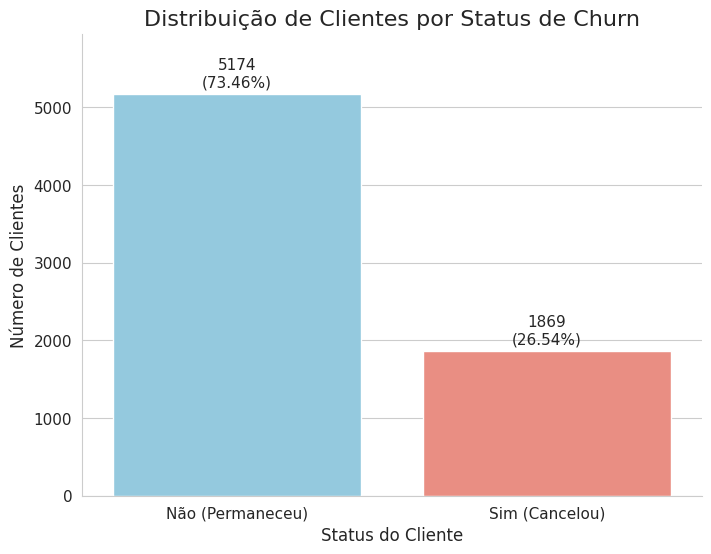

In [41]:

import matplotlib.pyplot as plt
import seaborn as sns


# Calcular contagem e percentual
churn_counts = df["Churn"].value_counts()
churn_percentage = df["Churn"].value_counts(normalize=True) * 100

# Mapear índices para rótulos claros
labels = churn_counts.index.map({0: "Não (Permaneceu)", 1: "Sim (Cancelou)"})

# Configurar estilo do gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

# Criar gráfico de barras
ax = sns.barplot(x=labels, y=churn_counts.values, palette=["skyblue", "salmon"])

# Adicionar título e rótulos
plt.title("Distribuição de Clientes por Status de Churn", fontsize=16)
plt.xlabel("Status do Cliente", fontsize=12)
plt.ylabel("Número de Clientes", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Adicionar anotações com percentuais
for index, value in enumerate(churn_counts.values):
    percentage_str = f"{churn_percentage.values[index]:.2f}%"
    ax.text(index, value + 50, f"{value}\n({percentage_str})", ha="center", va="bottom", fontsize=11)

# Ajustar limites do eixo Y para melhor visualização das anotações
ax.set_ylim(0, churn_counts.max() * 1.15)

# Remover bordas desnecessárias
sns.despine()

plt.show()

Gerei o gráfico de barras que ilustra a distribuição dos clientes com base no status de Churn.
Como podemos observar no gráfico, existe um desbalanceamento entre as classes: a maioria dos clientes (aproximadamente 73.46%) permaneceu com a empresa, enquanto cerca de 26.54% cancelaram o serviço.
Esta visualização confirma a taxa de churn que havíamos calculado e destaca a importância de investigar os fatores que levam a essa evasão de pouco mais de um quarto dos clientes.

In [45]:

# 1. Selecionar Variáveis Categóricas para Análise
categorical_cols_to_analyze = [
    "Genero", "Idoso", "Possui_Parceiro", "Possui_Dependentes",
    "Servico_Telefonico", "Multiplas_Linhas", "Servico_Internet",
    "Seguranca_Online", "Backup_Online", "Protecao_Dispositivo",
    "Suporte_Tecnico", "Streaming_TV", "Streaming_Filmes",
    "Tipo_Contrato", "Fatura_Online", "Metodo_Pagamento"
]
valid_cols = [col for col in categorical_cols_to_analyze if col in df.columns]
print(f"Analisando Churn por: {valid_cols}")

# 2. Calcular Taxa de Churn por Categoria
summary_content = "# Taxa de Churn por Categoria\n\n"
churn_rates_data = {}

for col in valid_cols:
    print(f"Calculando taxa de churn para: {col}")
    churn_rate = df.groupby(col)["Churn"].mean().sort_values(ascending=False) * 100
    churn_rates_data[col] = churn_rate

    # Adicionar ao resumo em Markdown
    summary_content += f"## {col}\n\n"
    # Converter Series para DataFrame para melhor formatação e nome de coluna
    churn_rate_df = churn_rate.round(2).reset_index()
    churn_rate_df.columns = [col, "Taxa de Churn (%)"] # Definir nomes das colunas
    summary_content += churn_rate_df.to_markdown(index=False)
    summary_content += "\n\n"

churn_rates_data_serializable = {k: v.to_dict() for k, v in churn_rates_data.items()}

print(summary_content)


Analisando Churn por: ['Genero', 'Idoso', 'Possui_Parceiro', 'Possui_Dependentes', 'Servico_Telefonico', 'Multiplas_Linhas', 'Servico_Internet', 'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Online', 'Metodo_Pagamento']
Calculando taxa de churn para: Genero
Calculando taxa de churn para: Idoso
Calculando taxa de churn para: Possui_Parceiro
Calculando taxa de churn para: Possui_Dependentes
Calculando taxa de churn para: Servico_Telefonico
Calculando taxa de churn para: Multiplas_Linhas
Calculando taxa de churn para: Servico_Internet
Calculando taxa de churn para: Seguranca_Online
Calculando taxa de churn para: Backup_Online
Calculando taxa de churn para: Protecao_Dispositivo
Calculando taxa de churn para: Suporte_Tecnico
Calculando taxa de churn para: Streaming_TV
Calculando taxa de churn para: Streaming_Filmes
Calculando taxa de churn para: Tipo_Contrato
Calculando taxa de churn para: Fatura_

In [46]:
churn_rates_data_serializable

{'Genero': {'Female': 26.920871559633024, 'Male': 26.160337552742618},
 'Idoso': {1: 41.68126094570928, 0: 23.606168446026096},
 'Possui_Parceiro': {0: 32.95797857731392, 1: 19.66490299823633},
 'Possui_Dependentes': {0: 31.279140482465028, 1: 15.450236966824646},
 'Servico_Telefonico': {1: 26.70963684955196, 0: 24.926686217008797},
 'Multiplas_Linhas': {'Yes': 28.6098956580276,
  'No': 25.04424778761062,
  'No phone service': 24.926686217008797},
 'Servico_Internet': {'Fiber optic': 41.89276485788114,
  'DSL': 18.95910780669145,
  'No': 7.404980340760157},
 'Seguranca_Online': {'No': 41.76672384219554,
  'Yes': 14.611193660227837,
  'No internet service': 7.404980340760157},
 'Backup_Online': {'No': 39.92875647668394,
  'Yes': 21.531494442157268,
  'No internet service': 7.404980340760157},
 'Protecao_Dispositivo': {'No': 39.127625201938606,
  'Yes': 22.50206440957886,
  'No internet service': 7.404980340760157},
 'Suporte_Tecnico': {'No': 41.63547365390153,
  'Yes': 15.16634050880626

Dados das taxas de churn carregados para 16 variáveis.
Gerando gráfico para: Genero


<ipython-input-49-5eefb6ab3c9d>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=rates_series.values, y=labels, palette=palette, orient="h")


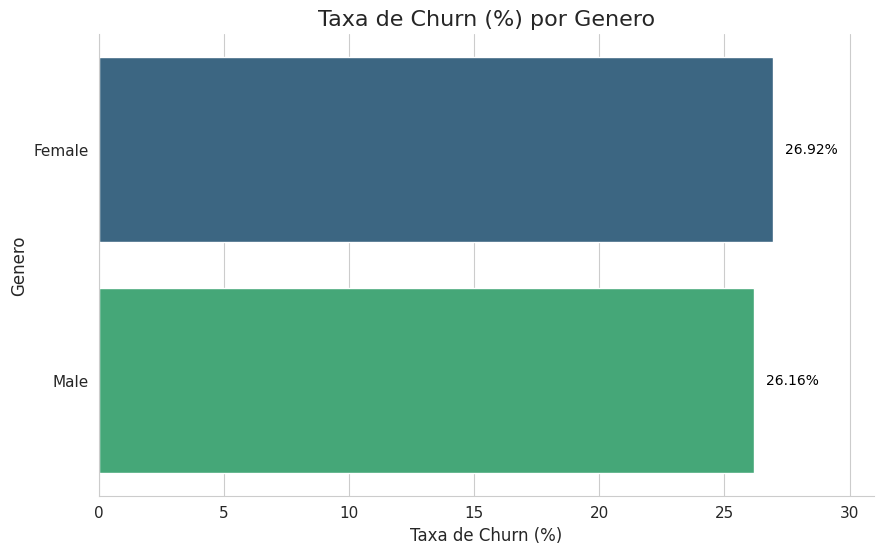

Gerando gráfico para: Idoso


<ipython-input-49-5eefb6ab3c9d>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=rates_series.values, y=labels, palette=palette, orient="h")


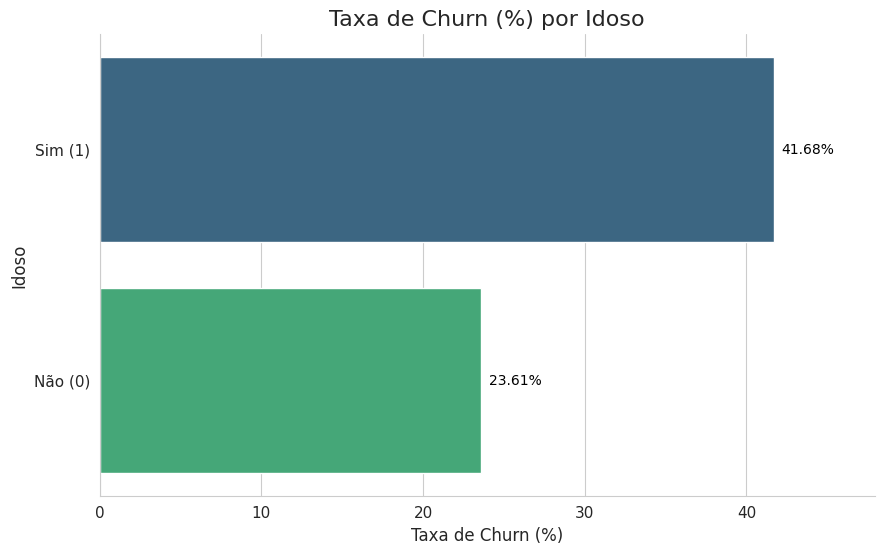

Gerando gráfico para: Possui_Parceiro


<ipython-input-49-5eefb6ab3c9d>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=rates_series.values, y=labels, palette=palette, orient="h")


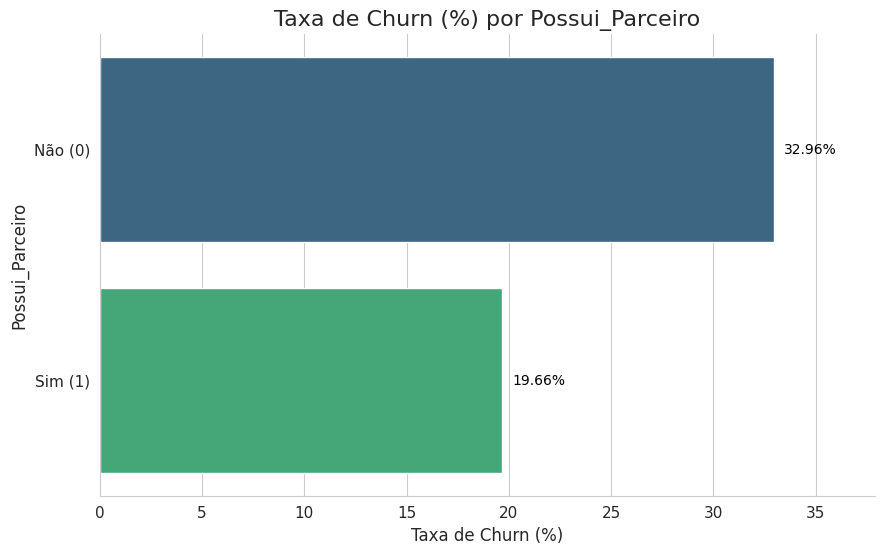

Gerando gráfico para: Possui_Dependentes


<ipython-input-49-5eefb6ab3c9d>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=rates_series.values, y=labels, palette=palette, orient="h")


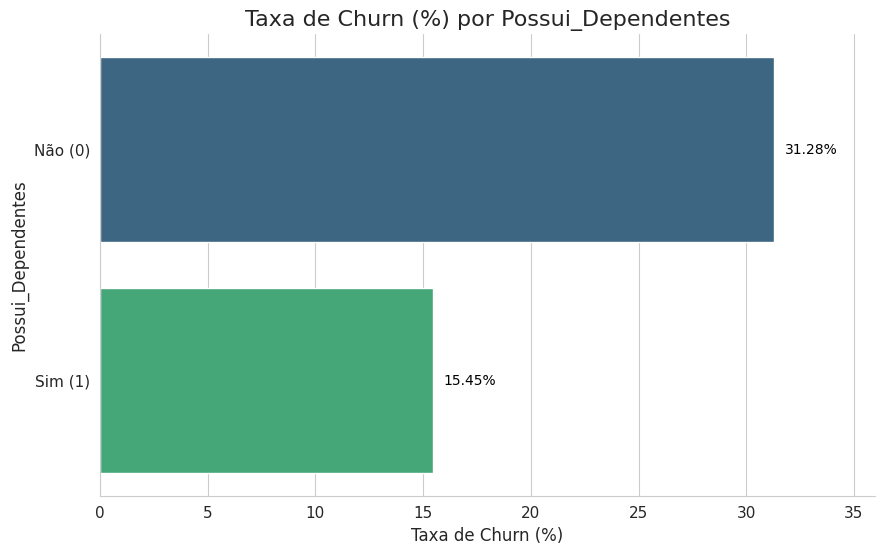

Gerando gráfico para: Servico_Telefonico


<ipython-input-49-5eefb6ab3c9d>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=rates_series.values, y=labels, palette=palette, orient="h")


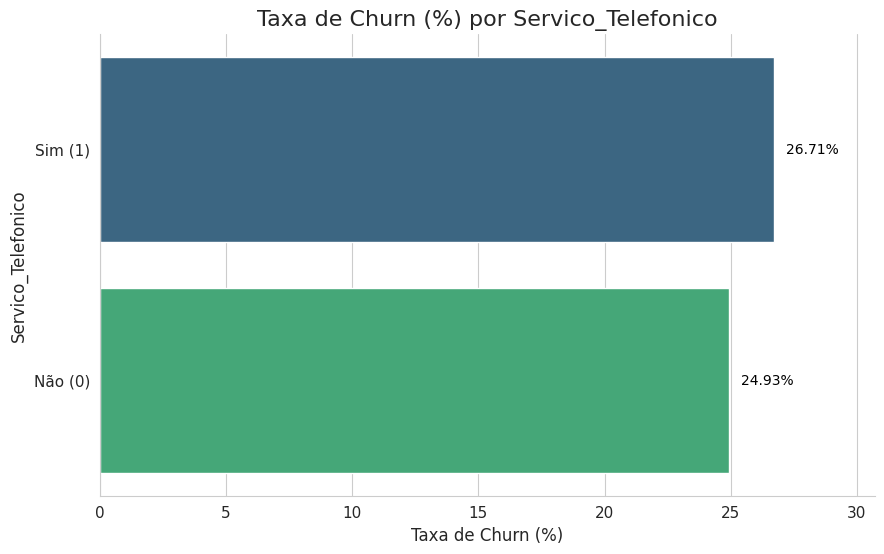

Gerando gráfico para: Multiplas_Linhas


<ipython-input-49-5eefb6ab3c9d>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=rates_series.values, y=labels, palette=palette, orient="h")


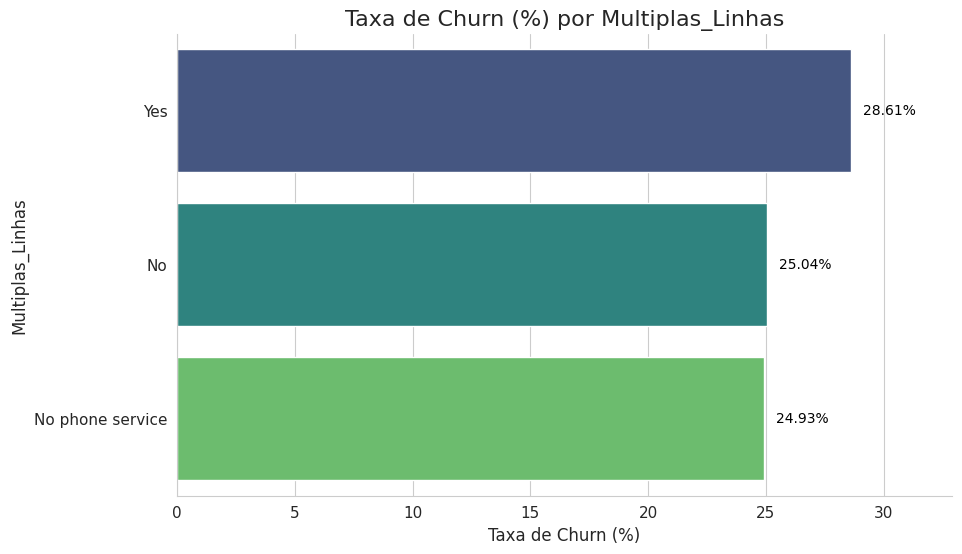

Gerando gráfico para: Servico_Internet


<ipython-input-49-5eefb6ab3c9d>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=rates_series.values, y=labels, palette=palette, orient="h")


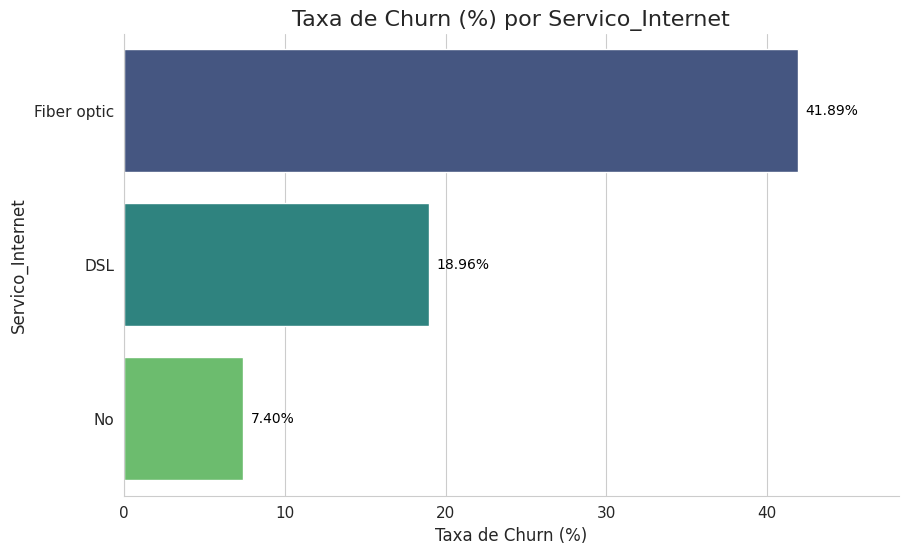

Gerando gráfico para: Seguranca_Online


<ipython-input-49-5eefb6ab3c9d>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=rates_series.values, y=labels, palette=palette, orient="h")


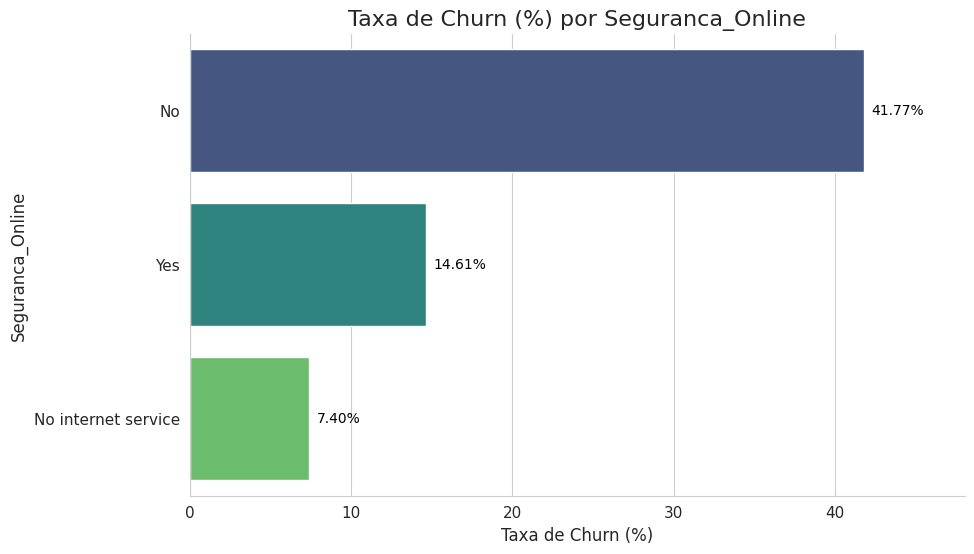

Gerando gráfico para: Backup_Online


<ipython-input-49-5eefb6ab3c9d>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=rates_series.values, y=labels, palette=palette, orient="h")


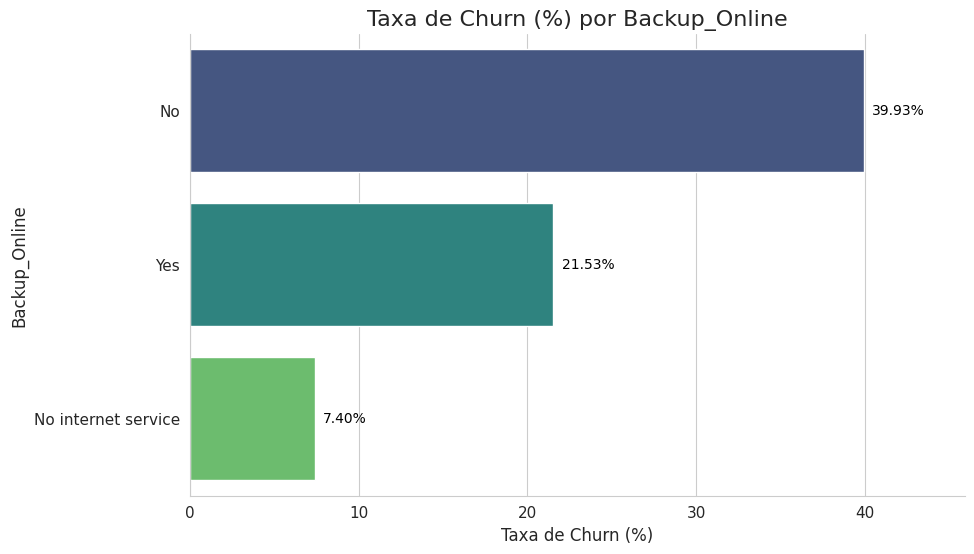

Gerando gráfico para: Protecao_Dispositivo


<ipython-input-49-5eefb6ab3c9d>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=rates_series.values, y=labels, palette=palette, orient="h")


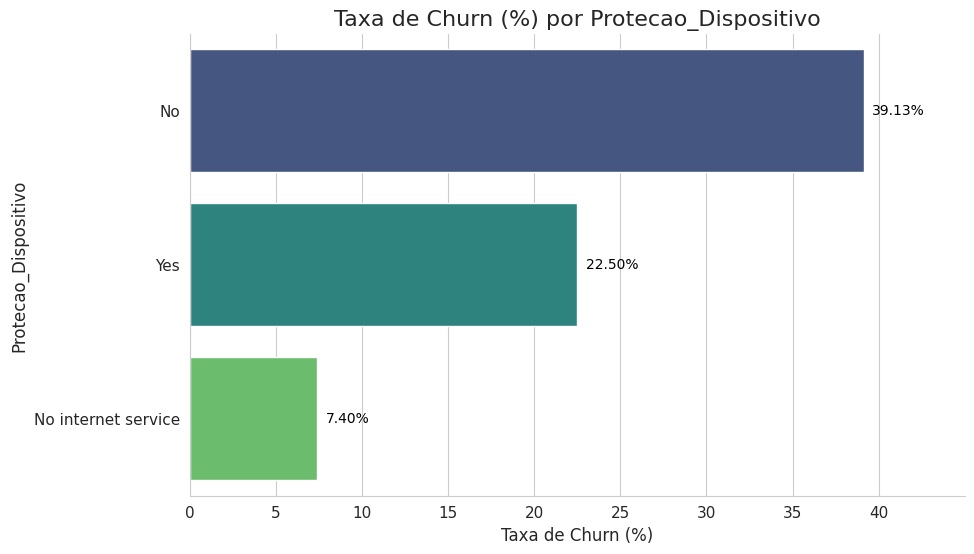

Gerando gráfico para: Suporte_Tecnico


<ipython-input-49-5eefb6ab3c9d>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=rates_series.values, y=labels, palette=palette, orient="h")


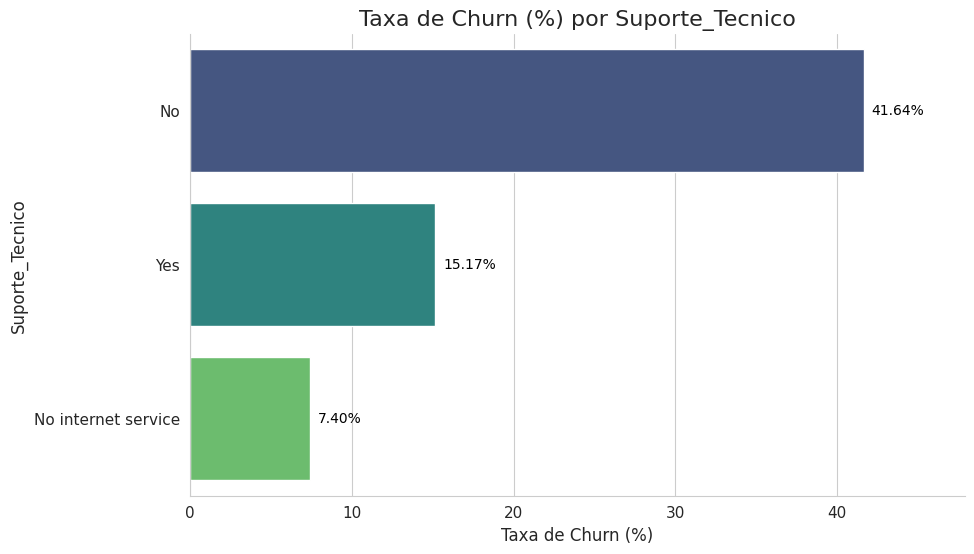

Gerando gráfico para: Streaming_TV


<ipython-input-49-5eefb6ab3c9d>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=rates_series.values, y=labels, palette=palette, orient="h")


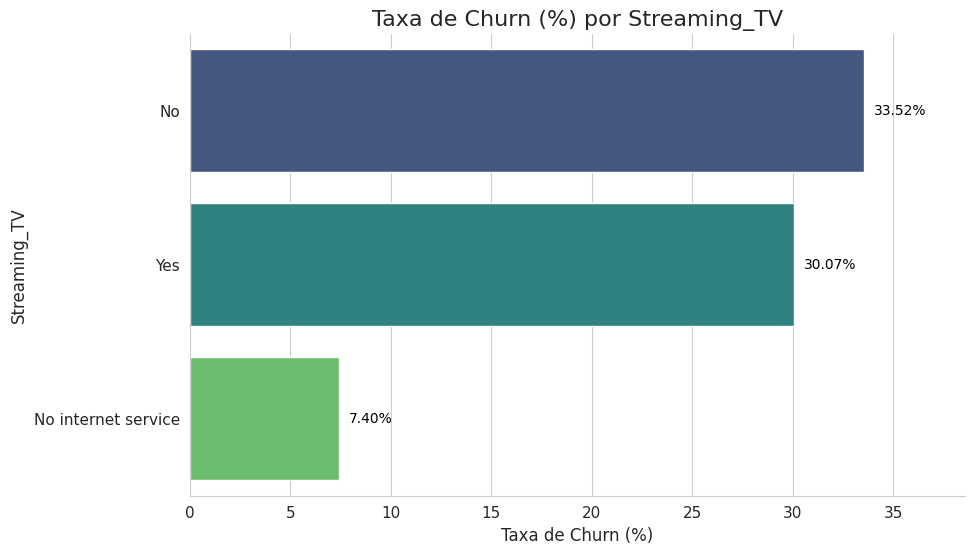

Gerando gráfico para: Streaming_Filmes


<ipython-input-49-5eefb6ab3c9d>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=rates_series.values, y=labels, palette=palette, orient="h")


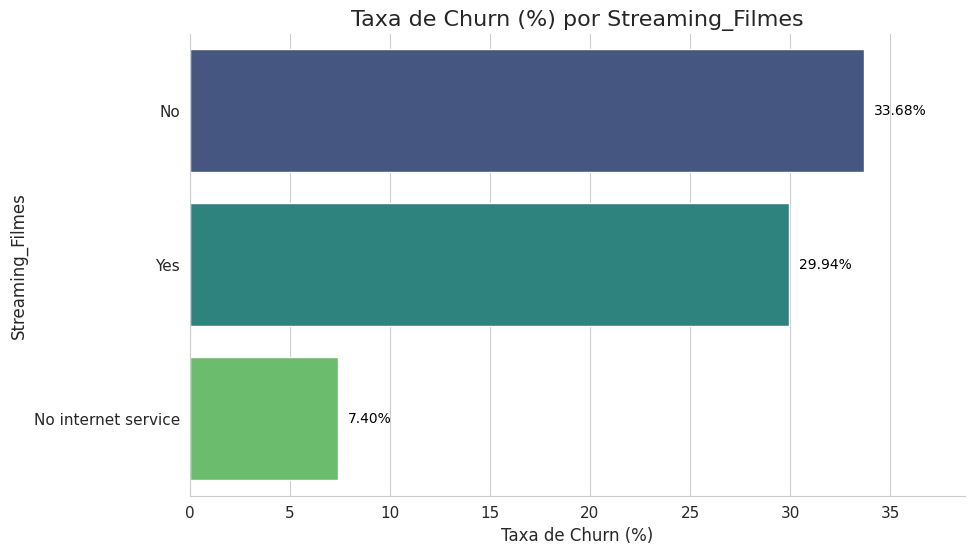

Gerando gráfico para: Tipo_Contrato


<ipython-input-49-5eefb6ab3c9d>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=rates_series.values, y=labels, palette=palette, orient="h")


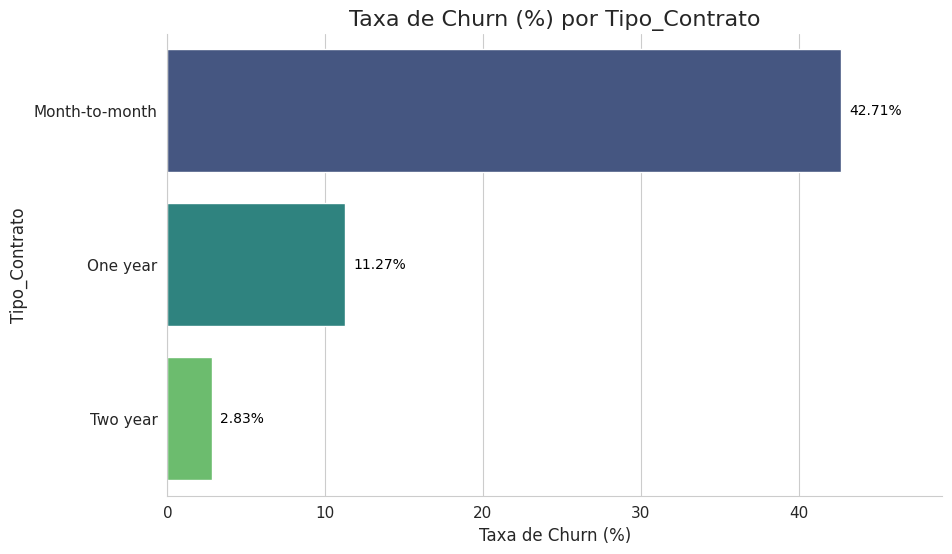

Gerando gráfico para: Fatura_Online


<ipython-input-49-5eefb6ab3c9d>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=rates_series.values, y=labels, palette=palette, orient="h")


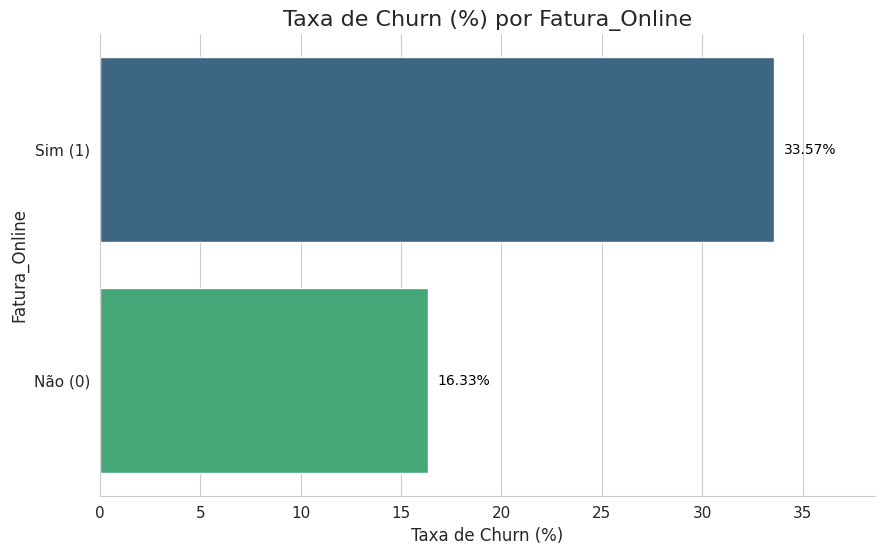

Gerando gráfico para: Metodo_Pagamento


<ipython-input-49-5eefb6ab3c9d>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=rates_series.values, y=labels, palette=palette, orient="h")


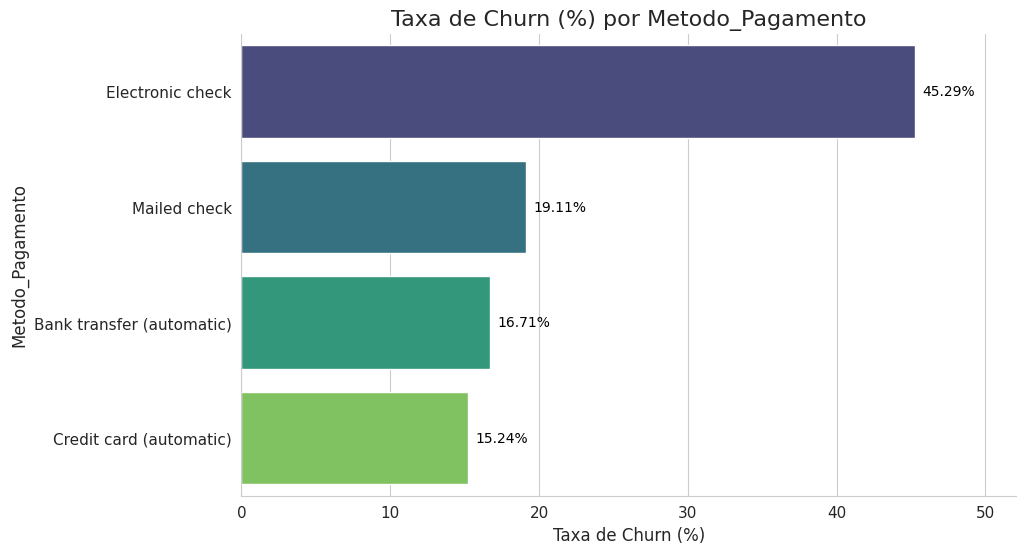


Geração de gráficos concluída.


In [49]:

import json

churn_rates_data = churn_rates_data_serializable
print(f"Dados das taxas de churn carregados para {len(churn_rates_data)} variáveis.")

# Configurar estilo seaborn
sns.set_style("whitegrid")

# Iterar sobre cada variável e gerar um gráfico
for col, rates_dict in churn_rates_data.items():
    print(f"Gerando gráfico para: {col}")
    # Converter o dicionário de taxas de volta para Series
    if not rates_dict:
        print(f"  Aviso: Dicionário de taxas vazio para {col}. Pulando gráfico.")
        continue
    try:
        numeric_indices = pd.to_numeric(list(rates_dict.keys()))
        rates_series = pd.Series(rates_dict, index=numeric_indices).dropna() # Drop NaNs from rates
    except ValueError:
        rates_series = pd.Series(rates_dict).dropna()

    # Verificar se a série está vazia após dropna
    if rates_series.empty:
        print(f"  Aviso: Série de taxas vazia ou contém apenas NaN para {col} após dropna. Pulando gráfico.")
        continue

    # Ordenar para melhor visualização
    rates_series = rates_series.sort_values(ascending=False)

    # Mapear índices numéricos para rótulos claros
    if col in ["Idoso", "Possui_Parceiro", "Possui_Dependentes", "Servico_Telefonico", "Fatura_Online"]:
          try:
              rates_series.index = rates_series.index.astype(int)
              labels = rates_series.index.map({0: "Não (0)", 1: "Sim (1)"})
          except (ValueError, TypeError):
              print(f"  Aviso: Não foi possível converter índice de {col} para int. Usando índice original.")
              labels = rates_series.index.astype(str)
    else:
        labels = rates_series.index.astype(str)

    # Criar a figura
    plt.figure(figsize=(10, max(6, len(rates_series) * 0.8)))
    palette = sns.color_palette("viridis", n_colors=len(rates_series))
    ax = sns.barplot(x=rates_series.values, y=labels, palette=palette, orient="h")

    # Adicionar título e rótulos
    plt.title(f"Taxa de Churn (%) por {col}", fontsize=16)
    plt.xlabel("Taxa de Churn (%)", fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)

    # Adicionar anotações com os valores percentuais
    valid_values = rates_series.values[np.isfinite(rates_series.values)] # Ensure only finite values for max
    if valid_values.size == 0:
          print(f"  Aviso: Nenhum valor finito encontrado para {col}. Pulando anotações e ajuste de limite.")
          max_val = 10 # Default max value if no valid data
    else:
          max_val = max(valid_values)
          for index, value in enumerate(rates_series.values):
              if np.isfinite(value):
                  ax.text(value + 0.5, index, f"{value:.2f}%", color="black", ha="left", va="center", fontsize=10)

    # Ajustar limites do eixo X
    ax.set_xlim(0, max_val * 1.15 if max_val > 0 else 10) # Handle max_val being 0

    # Remover bordas desnecessárias
    sns.despine()

    plt.show()


print("\nGeração de gráficos concluída.")




# Análise Visual: Taxa de Churn por Categoria

Este documento resume os principais padrões observados nos gráficos que comparam a taxa de churn entre diferentes categorias de clientes.

## Principais Padrões Identificados:

1.  **Tipo_Contrato:**
    *   Clientes com contrato **Mensal (Month-to-month)** apresentam uma taxa de churn drasticamente maior (acima de 42%) em comparação com contratos anuais (cerca de 11%) e, especialmente, contratos de dois anos (abaixo de 3%). Isso sugere que a flexibilidade do contrato mensal também leva a uma menor fidelidade.

2.  **Servico_Internet:**
    *   Clientes com **Fibra óptica** têm uma taxa de churn significativamente mais alta (acima de 41%) do que clientes com DSL (abaixo de 20%).
    *   Clientes **sem serviço de internet** têm uma taxa de churn muito baixa (abaixo de 8%), indicando que o churn está fortemente associado aos serviços de internet.

3.  **Metodo_Pagamento:**
    *   Clientes que utilizam **Débito em conta eletrônico (Electronic check)** mostram a maior taxa de churn (acima de 45%).
    *   Os demais métodos (Boleto, Transferência automática, Cartão de crédito automático) apresentam taxas de churn consideravelmente menores (entre 15% e 19%).

4.  **Serviços Adicionais de Internet (Seguranca_Online, Backup_Online, Protecao_Dispositivo, Suporte_Tecnico):**
    *   De forma consistente, clientes que **não possuem** esses serviços adicionais (`No`) apresentam taxas de churn mais elevadas (geralmente acima de 30-40%) em comparação com aqueles que possuem (`Yes`).
    *   Clientes sem serviço de internet (`No internet service`) têm taxas de churn muito baixas, como esperado.
    *   **Suporte_Tecnico** e **Seguranca_Online** parecem ser particularmente importantes: a ausência desses serviços está associada a taxas de churn acima de 41%.

5.  **Idoso:**
    *   Clientes **Idosos (Sim=1)** têm uma taxa de churn notavelmente maior (acima de 41%) do que clientes não idosos (Não=0, abaixo de 24%).

6.  **Possui_Parceiro / Possui_Dependentes:**
    *   Clientes **sem parceiro(a)** (Não=0) e **sem dependentes** (Não=0) tendem a ter taxas de churn mais altas (acima de 30%) em comparação com aqueles que possuem parceiros ou dependentes (abaixo de 20%).

7.  **Outras Variáveis:**
    *   **Genero:** A diferença na taxa de churn entre gêneros é mínima, sugerindo que não é um fator de grande diferenciação.
    *   **Servico_Telefonico / Multiplas_Linhas:** Clientes sem serviço telefônico têm baixo churn. Entre os que possuem, ter múltiplas linhas está associado a um churn ligeiramente maior.
    *   **Streaming_TV / Streaming_Filmes:** A ausência desses serviços está associada a taxas de churn um pouco maiores do que a presença, mas a diferença não é tão acentuada quanto nos serviços de segurança/suporte.
    *   **Fatura_Online:** Clientes com fatura online (Sim=1) apresentam maior taxa de churn.

## Conclusão Preliminar

A análise visual revela perfis claros de clientes com maior propensão ao churn. Fatores como **contrato mensal, serviço de fibra óptica, método de pagamento por débito eletrônico, ausência de serviços de segurança e suporte técnico, ser idoso e não possuir parceiro/dependentes** parecem estar fortemente associados a uma maior taxa de evasão. Esses insights são valiosos para direcionar estratégias de retenção e para a seleção de features em modelos preditivos.

In [50]:


# 1. Selecionar Variáveis Numéricas para Análise
# Excluir colunas binárias que foram tratadas como categóricas ou são ID/Flags
numerical_cols_to_analyze = [
    "Meses_Contrato",
    "Cobranca_Mensal",
    "Cobranca_Total",
    "Cobranca_Diaria"
]
# Verificar se as colunas existem
valid_cols = [col for col in numerical_cols_to_analyze if col in df.columns]
print(f"Analisando variáveis numéricas por Churn: {valid_cols}")

# 2. Calcular Métricas Descritivas por Grupo de Churn
if "Churn" in df.columns and valid_cols:
    desc_by_churn = df.groupby("Churn")[valid_cols].describe()

    print("\n--- Descrição Numérica por Grupo de Churn ---")
    # Transpor para melhor visualização no markdown, se necessário, ou formatar
    # Usar .T para transpor ou formatar diretamente
    print(desc_by_churn.round(2).to_markdown())


else:
    if "Churn" not in df.columns:
        print("Erro: Coluna \'Churn\' não encontrada para agrupamento.")
    if not valid_cols:
        print("Erro: Nenhuma coluna numérica válida encontrada para análise.")



Analisando variáveis numéricas por Churn: ['Meses_Contrato', 'Cobranca_Mensal', 'Cobranca_Total', 'Cobranca_Diaria']

--- Descrição Numérica por Grupo de Churn ---
|   Churn |   ('Meses_Contrato', 'count') |   ('Meses_Contrato', 'mean') |   ('Meses_Contrato', 'std') |   ('Meses_Contrato', 'min') |   ('Meses_Contrato', '25%') |   ('Meses_Contrato', '50%') |   ('Meses_Contrato', '75%') |   ('Meses_Contrato', 'max') |   ('Cobranca_Mensal', 'count') |   ('Cobranca_Mensal', 'mean') |   ('Cobranca_Mensal', 'std') |   ('Cobranca_Mensal', 'min') |   ('Cobranca_Mensal', '25%') |   ('Cobranca_Mensal', '50%') |   ('Cobranca_Mensal', '75%') |   ('Cobranca_Mensal', 'max') |   ('Cobranca_Total', 'count') |   ('Cobranca_Total', 'mean') |   ('Cobranca_Total', 'std') |   ('Cobranca_Total', 'min') |   ('Cobranca_Total', '25%') |   ('Cobranca_Total', '50%') |   ('Cobranca_Total', '75%') |   ('Cobranca_Total', 'max') |   ('Cobranca_Diaria', 'count') |   ('Cobranca_Diaria', 'mean') |   ('Cobranca_Diaria', 

Gerando gráficos comparativos para: ['Meses_Contrato', 'Cobranca_Mensal', 'Cobranca_Total', 'Cobranca_Diaria']
Gerando boxplot para: Meses_Contrato


<ipython-input-51-b9e3b565f800>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn_Label", y=col, data=df, palette=["skyblue", "salmon"])


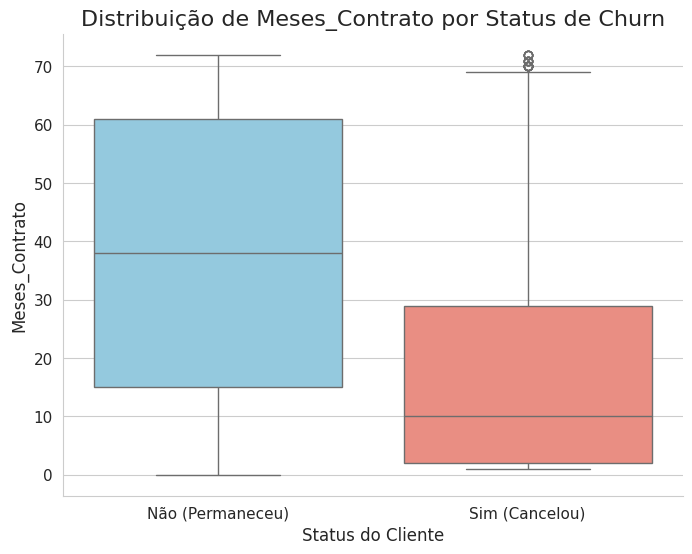

Gerando boxplot para: Cobranca_Mensal


<ipython-input-51-b9e3b565f800>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn_Label", y=col, data=df, palette=["skyblue", "salmon"])


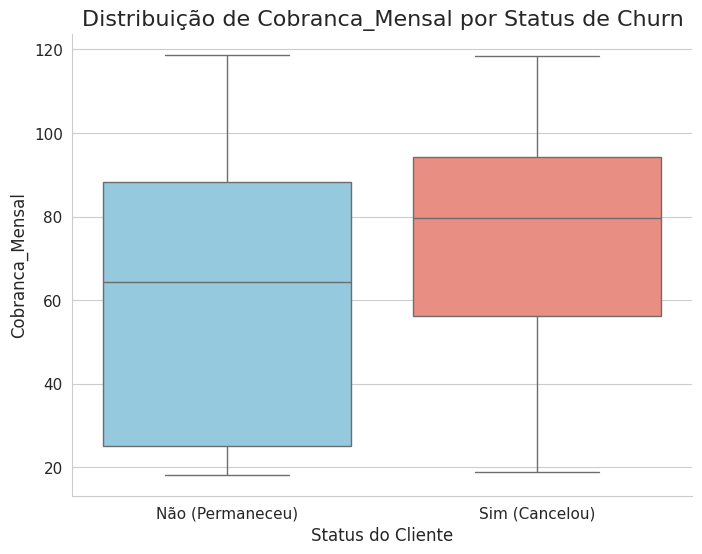

Gerando boxplot para: Cobranca_Total


<ipython-input-51-b9e3b565f800>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn_Label", y=col, data=df, palette=["skyblue", "salmon"])


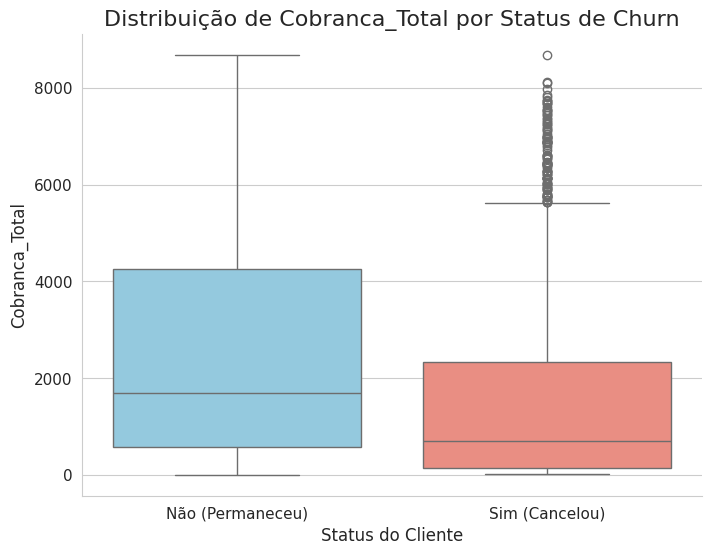

Gerando boxplot para: Cobranca_Diaria


<ipython-input-51-b9e3b565f800>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn_Label", y=col, data=df, palette=["skyblue", "salmon"])


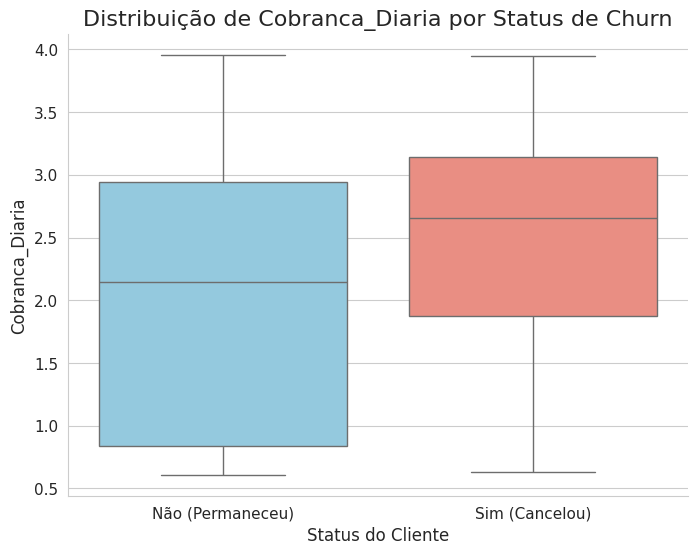


Geração de gráficos comparativos concluída.


In [51]:

# 1. Selecionar Variáveis Numéricas para Análise
numerical_cols_to_analyze = [
    "Meses_Contrato",
    "Cobranca_Mensal",
    "Cobranca_Total",
    "Cobranca_Diaria"
]
valid_cols = [col for col in numerical_cols_to_analyze if col in df.columns]
print(f"Gerando gráficos comparativos para: {valid_cols}")

# Configurar estilo seaborn
sns.set_style("whitegrid")

# Mapear Churn para rótulos claros para os gráficos
df["Churn_Label"] = df["Churn"].map({0: "Não (Permaneceu)", 1: "Sim (Cancelou)"})

# 2. Gerar Gráficos Comparativos (Boxplots)
for col in valid_cols:
    print(f"Gerando boxplot para: {col}")
    plt.figure(figsize=(8, 6))

    # Criar boxplot comparando os grupos de Churn
    sns.boxplot(x="Churn_Label", y=col, data=df, palette=["skyblue", "salmon"])

    # Adicionar título e rótulos
    plt.title(f"Distribuição de {col} por Status de Churn", fontsize=16)
    plt.xlabel("Status do Cliente", fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)

    # Remover bordas desnecessárias
    sns.despine()

    plt.show()
print("\nGeração de gráficos comparativos concluída.")




# Análise Visual: Variáveis Numéricas por Status de Churn

Este documento resume as diferenças observadas nas distribuições das principais variáveis numéricas (`Meses_Contrato`, `Cobranca_Mensal`, `Cobranca_Total`, `Cobranca_Diaria`) entre os clientes que permaneceram (Churn=0) e os que cancelaram (Churn=1), com base nos boxplots gerados.

## Principais Padrões Observados:

1.  **Meses_Contrato (Tempo de Contrato):**
    *   **Observação:** Há uma diferença muito clara. Clientes que **cancelaram (Churn=1)** tendem a ter um tempo de contrato significativamente menor.
    *   **Detalhes:** A mediana de `Meses_Contrato` para quem cancelou é de apenas 10 meses, enquanto para quem permaneceu é de 38 meses. A maior parte (75%) dos clientes que cancelaram o fizeram com até 29 meses de contrato, enquanto 75% dos que permaneceram têm 61 meses ou menos.
    *   **Implicação:** Clientes mais recentes são muito mais propensos a cancelar.

2.  **Cobranca_Mensal:**
    *   **Observação:** Clientes que **cancelaram (Churn=1)** tendem a ter cobranças mensais mais altas.
    *   **Detalhes:** A mediana da `Cobranca_Mensal` para quem cancelou é de R$ 79.65, comparada a R$ 64.43 para quem permaneceu. A distribuição para quem cancelou está concentrada em valores mais altos (entre R$ 56.15 e R$ 94.20 para o intervalo interquartil).
    *   **Implicação:** Valores mensais mais altos podem ser um fator que contribui para o churn.

3.  **Cobranca_Total:**
    *   **Observação:** Clientes que **permaneceram (Churn=0)** tendem a ter uma `Cobranca_Total` acumulada significativamente maior, o que é esperado dado o maior tempo de contrato.
    *   **Detalhes:** A mediana da `Cobranca_Total` para quem permaneceu é R$ 1679.52, enquanto para quem cancelou é R$ 703.55. A distribuição para quem cancelou é muito mais concentrada em valores baixos.
    *   **Implicação:** Embora a cobrança total seja menor para quem cancela, isso é um reflexo do menor tempo de contrato, e não necessariamente indica que baixo gasto total previne churn. A análise deve focar mais no tempo de contrato e na cobrança mensal.

4.  **Cobranca_Diaria:**
    *   **Observação:** Similar à `Cobranca_Mensal`, a `Cobranca_Diaria` estimada tende a ser maior para clientes que **cancelaram (Churn=1)**.
    *   **Detalhes:** A mediana da `Cobranca_Diaria` para quem cancelou é R$ 2.66, contra R$ 2.15 para quem permaneceu.
    *   **Implicação:** Reforça a ideia de que um custo percebido mais alto (seja mensal ou diário) está associado a maior churn.

## Conclusão Preliminar

A análise comparativa das variáveis numéricas revela diferenças importantes entre os grupos:
*   Clientes que cancelam geralmente têm **menos tempo de contrato** e **cobranças mensais/diárias mais altas**.
*   Clientes que permanecem têm mais tempo de contrato e, consequentemente, maior cobrança total acumulada, mas suas cobranças mensais/diárias tendem a ser menores.

Esses padrões reforçam a importância do tempo de contrato e do valor mensal percebido como fatores críticos na decisão de churn.


# Relatório Final: Análise de Evasão de Clientes (Churn) - Telecom X

## 1. Introdução

A Telecom X enfrenta um desafio significativo relacionado à alta taxa de evasão de clientes (Churn). A perda contínua de clientes impacta negativamente a receita e o crescimento da empresa. Para combater este problema, foi iniciado o projeto "Churn de Clientes", com o objetivo de compreender os fatores que levam os clientes a cancelar seus serviços.

Este relatório documenta a análise de dados exploratória realizada sobre os dados de clientes da Telecom X. O objetivo principal desta análise foi identificar padrões e características associadas aos clientes que cancelaram seus serviços, fornecendo insights valiosos que possam subsidiar a criação de modelos preditivos e o desenvolvimento de estratégias eficazes para a retenção de clientes.

A análise abrange desde a coleta e tratamento dos dados brutos até a exploração visual e estatística das variáveis mais relevantes, culminando em conclusões e recomendações práticas para a empresa.



## 2. Coleta, Limpeza e Tratamento de Dados

A análise partiu de dados brutos em formato JSON, disponibilizados via API (link do GitHub). As seguintes etapas foram cruciais para preparar os dados para a análise exploratória:

1.  **Coleta e Carregamento:** Os dados foram carregados diretamente da fonte JSON utilizando Python e a biblioteca Pandas.
2.  **Normalização:** A estrutura JSON continha dados aninhados (informações de cliente, telefone, internet e conta). Estes foram normalizados e expandidos em colunas individuais no DataFrame principal para facilitar a manipulação.
3.  **Verificação de Qualidade:**
    *   **Tipos de Dados:** A coluna `Charges.Total` (Cobranca_Total) foi identificada como tipo `object` devido a valores não numéricos (espaços em branco) e convertida para tipo numérico (`float64`).
    *   **Valores Ausentes:**
        *   Foram encontrados 224 valores ausentes na coluna `Churn`. Como esta é a variável alvo, as linhas correspondentes foram removidas do dataset.
        *   Foram encontrados 11 valores ausentes na coluna `Charges.Total`. Verificou-se que todos estes casos correspondiam a clientes com `tenure` (Meses_Contrato) igual a 0. Estes valores foram imputados com 0, assumindo que clientes novos ainda não possuem cobrança total registrada.
    *   **Duplicados:** Nenhuma linha duplicada foi encontrada.
    *   **Inconsistências:** Não foram identificadas inconsistências significativas nos valores das demais colunas categóricas ou numéricas.
4.  **Engenharia de Features:** Foi criada a coluna `Contas_Diarias` (Cobranca_Diaria), calculada dividindo a `Cobranca_Mensal` por 30, para oferecer uma perspectiva adicional sobre o custo percebido pelo cliente.
5.  **Padronização e Transformação:**
    *   **Conversão Binária:** Colunas com respostas "Yes"/"No" (`Churn`, `Partner`, `Dependents`, `PhoneService`, `PaperlessBilling`) foram convertidas para formato numérico (1 para "Yes", 0 para "No").
    *   **Renomeação:** Todas as colunas foram renomeadas para português (ex: `tenure` -> `Meses_Contrato`, `Charges.Monthly` -> `Cobranca_Mensal`) para maior clareza e acessibilidade.

Após estas etapas, o dataset final (`TelecomX_Data_Standardized.csv`), contendo 7043 linhas e 22 colunas, estava pronto e limpo para a análise exploratória.




## 3. Análise Exploratória de Dados (EDA)

Com os dados limpos e padronizados, realizamos uma análise exploratória para entender a distribuição das variáveis e identificar relações com a variável alvo, Churn.

### 3.1 Distribuição Geral do Churn

Primeiramente, analisamos a proporção geral de clientes que cancelaram versus os que permaneceram. Observou-se um desbalanceamento, com a maioria dos clientes (aproximadamente 73.5%) permanecendo na base, enquanto 26.5% cancelaram.

![Distribuição de Clientes por Status de Churn](churn_distribution_plot.png)
*Figura 1: Proporção de clientes que permaneceram (Não) e cancelaram (Sim).*

### 3.2 Análise de Churn por Variáveis Categóricas

Investigamos como a taxa de churn varia entre diferentes categorias de clientes. Alguns padrões notáveis emergiram:

*   **Tipo de Contrato:** A taxa de churn é drasticamente maior para contratos mensais (>42%) em comparação com contratos de longo prazo (Anual: ~11%, Dois anos: <3%).
    ![Taxa de Churn por Tipo de Contrato](churn_rate_by_tipo_contrato.png)
    *Figura 2: Churn por Tipo de Contrato.*

*   **Serviço de Internet:** Clientes com Fibra Óptica apresentam churn significativamente maior (>41%) que clientes com DSL (<20%). Clientes sem serviço de internet têm churn muito baixo (<8%).
    ![Taxa de Churn por Serviço de Internet](churn_rate_by_servico_internet.png)
    *Figura 3: Churn por Serviço de Internet.*

*   **Método de Pagamento:** O pagamento via Débito Eletrônico (Electronic check) está associado à maior taxa de churn (>45%).
    ![Taxa de Churn por Método de Pagamento](churn_rate_by_metodo_pagamento.png)
    *Figura 4: Churn por Método de Pagamento.*

*   **Serviços Adicionais:** A ausência de serviços como Segurança Online e Suporte Técnico está fortemente correlacionada com taxas de churn mais altas (>41%).
    ![Taxa de Churn por Suporte Técnico](churn_rate_by_suporte_tecnico.png)
    *Figura 5: Churn por Suporte Técnico.*

*   **Perfil Demográfico:** Clientes idosos e aqueles sem parceiro(a) ou dependentes também mostraram taxas de churn mais elevadas.

(Para uma análise detalhada de todas as categorias, consulte o arquivo `visual_analysis_summary.md` gerado anteriormente).

### 3.3 Análise de Churn por Variáveis Numéricas

Comparamos a distribuição de variáveis numéricas chave entre os grupos que cancelaram e os que permaneceram:

*   **Meses de Contrato:** Clientes que cancelam têm um tempo de contrato significativamente menor (mediana de 10 meses vs. 38 meses).
    ![Distribuição de Meses de Contrato por Churn](boxplot_meses_contrato_by_churn.png)
    *Figura 6: Boxplot de Meses de Contrato por Status de Churn.*

*   **Cobrança Mensal:** Clientes que cancelam tendem a ter cobranças mensais mais altas (mediana de R$ 79.65 vs. R$ 64.43).
    ![Distribuição de Cobrança Mensal por Churn](boxplot_cobranca_mensal_by_churn.png)
    *Figura 7: Boxplot de Cobrança Mensal por Status de Churn.*

(Para estatísticas descritivas detalhadas por grupo, consulte o arquivo `numerical_desc_by_churn.md` gerado anteriormente).




## 4. Conclusões e Insights Principais

A análise exploratória dos dados da Telecom X revelou insights importantes sobre os fatores associados à evasão de clientes:

*   **Perfil de Risco:** Existe um perfil de cliente com maior probabilidade de churn, caracterizado por:
    *   **Contrato Mensal:** A falta de um compromisso de longo prazo é o indicador mais forte de churn.
    *   **Clientes Recentes:** O churn é muito mais comum nos primeiros meses de contrato.
    *   **Cobranças Mensais Elevadas:** Clientes que pagam mais mensalmente tendem a cancelar mais.
    *   **Serviço de Fibra Óptica:** Embora seja um serviço premium, está associado a um churn maior, talvez por custo, instabilidade percebida ou expectativas não atendidas.
    *   **Método de Pagamento Específico:** O uso de Débito Eletrônico (Electronic check) se destaca com alta taxa de churn.
    *   **Ausência de Serviços de Valor Agregado:** Clientes sem serviços como Segurança Online e Suporte Técnico são mais propensos a sair.
    *   **Demografia:** Clientes idosos e aqueles sem parceiros ou dependentes também apresentam maior risco.

*   **Fatores de Retenção:** Por outro lado, fatores associados à permanência do cliente incluem:
    *   **Contratos de Longo Prazo (1 ou 2 anos):** Clientes com esses contratos são significativamente mais leais.
    *   **Maior Tempo de Contrato (Tenure):** Clientes mais antigos tendem a permanecer.
    *   **Serviços Adicionais:** A adesão a serviços como Suporte Técnico e Segurança Online parece aumentar a retenção.
    *   **Clientes sem Serviço de Internet:** Este grupo tem uma taxa de churn muito baixa, indicando que o churn está mais concentrado entre usuários de internet.

*   **Importância do Valor Percebido:** A combinação de cobranças mensais altas e a ausência de serviços de suporte/segurança sugere que o valor percebido pelo cliente pode ser um fator crucial. Clientes com fibra óptica (geralmente mais cara) e sem suporte/segurança podem sentir que não estão recebendo um bom custo-benefício.

Esses insights fornecem uma base sólida para entender *quem* está saindo e *por quê*, permitindo que a Telecom X desenvolva ações mais direcionadas para reduzir a evasão.



## 5. Recomendações

Com base nos insights obtidos na análise exploratória, apresentamos as seguintes recomendações para a Telecom X, visando reduzir a taxa de evasão de clientes:

1.  **Incentivar Contratos de Longo Prazo:**
    *   Desenvolver campanhas ativas para migrar clientes de contratos mensais para planos anuais ou bienais, oferecendo descontos progressivos, bônus de serviço ou outros benefícios claros.
    *   Implementar programas de fidelidade que recompensem clientes com maior tempo de contrato (tenure).

2.  **Revisar Estratégia de Preços e Valor (Especialmente Fibra Óptica):**
    *   Analisar a estrutura de preços da Fibra Óptica, comparando com o mercado e avaliando a percepção de valor dos clientes, especialmente aqueles com churn elevado.
    *   Considerar o *bundling* (pacotes) de serviços de valor agregado, como Segurança Online e Suporte Técnico, especialmente para planos de Fibra Óptica, para aumentar o valor percebido e a dependência do serviço.
    *   Oferecer promoções ou descontos direcionados para clientes com alto custo mensal e baixo tempo de contrato.

3.  **Otimizar Métodos de Pagamento:**
    *   Investigar as razões por trás da alta taxa de churn associada ao Débito Eletrônico (Electronic check). Pode haver problemas no processo, falhas, ou ser um indicativo de menor estabilidade financeira do cliente.
    *   Incentivar a adoção de métodos de pagamento com menor churn, como débito automático em conta bancária ou cartão de crédito, talvez oferecendo pequenos descontos ou benefícios.

4.  **Fortalecer o Suporte e Serviços Adicionais:**
    *   Promover ativamente os serviços de Segurança Online e Suporte Técnico, destacando seus benefícios, especialmente para clientes de Fibra Óptica e Idosos.
    *   Considerar incluir um nível básico desses serviços em planos mais caros ou oferecer um período de teste gratuito para demonstrar valor.

5.  **Melhorar a Experiência do Cliente Recente (Baixo Tenure):**
    *   Reforçar o processo de *onboarding* para novos clientes, garantindo que compreendam os serviços, saibam como obter suporte e percebam valor desde o início.
    *   Monitorar de perto a satisfação dos clientes nos primeiros meses e intervir proativamente se houver sinais de insatisfação ou baixo uso.

6.  **Desenvolver Campanhas de Retenção Segmentadas:**
    *   Utilizar os perfis de risco identificados (ex: Idosos, clientes sem parceiro/dependentes, usuários de Fibra sem suporte) para criar ofertas e comunicações de retenção personalizadas.

7.  **Aprofundar a Análise:**
    *   Continuar a análise com técnicas mais avançadas, como a construção de modelos preditivos de churn, para identificar com maior precisão os clientes em risco e os fatores de maior impacto.
    *   Coletar dados adicionais, se possível, sobre a satisfação do cliente, motivos de contato com o suporte e uso específico dos serviços para enriquecer a análise.

Implementando estas recomendações, a Telecom X pode atuar de forma mais estratégica para reter seus clientes, reduzir a taxa de churn e fortalecer sua posição no mercado.



In [52]:

# 1. Selecionar Colunas Numéricas para Matriz de Correlação
# Inclui as colunas binárias (0/1) e as numéricas contínuas
numerical_cols_for_corr = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
print(f"Colunas incluídas na matriz de correlação: {numerical_cols_for_corr}")

# 2. Calcular a Matriz de Correlação (Pearson por padrão)
correlation_matrix = df[numerical_cols_for_corr].corr()

print("\n--- Matriz de Correlação (Resumo Churn) ---")
# Mostrar correlações com a variável Churn, ordenadas
churn_correlations = correlation_matrix["Churn"].sort_values(ascending=False)
print(churn_correlations.round(3).to_markdown())


Colunas incluídas na matriz de correlação: ['Churn', 'Idoso', 'Possui_Parceiro', 'Possui_Dependentes', 'Meses_Contrato', 'Servico_Telefonico', 'Fatura_Online', 'Cobranca_Mensal', 'Cobranca_Total', 'Cobranca_Diaria']

--- Matriz de Correlação (Resumo Churn) ---
|                    |   Churn |
|:-------------------|--------:|
| Churn              |   1     |
| Cobranca_Mensal    |   0.193 |
| Cobranca_Diaria    |   0.193 |
| Fatura_Online      |   0.192 |
| Idoso              |   0.151 |
| Servico_Telefonico |   0.012 |
| Possui_Parceiro    |  -0.15  |
| Possui_Dependentes |  -0.164 |
| Cobranca_Total     |  -0.198 |
| Meses_Contrato     |  -0.352 |


In [53]:

# 1. Identificar Colunas de Serviços Adicionais
# Estas são as colunas categóricas que indicam serviços específicos (Yes/No/No service)
additional_service_cols = [
    "Multiplas_Linhas",
    "Seguranca_Online",
    "Backup_Online",
    "Protecao_Dispositivo",
    "Suporte_Tecnico",
    "Streaming_TV",
    "Streaming_Filmes"
]

# Verificar se as colunas existem
valid_service_cols = [col for col in additional_service_cols if col in df.columns]
print(f"Colunas de serviços adicionais consideradas: {valid_service_cols}")

# 2. Criar Variável de Quantidade de Serviços Adicionais
# Contar quantos serviços têm o valor "Yes"
df["Qtd_Servicos_Adicionais"] = df[valid_service_cols].apply(lambda row: sum(row == "Yes"), axis=1)

print("\n--- Verificação da Nova Coluna (Qtd_Servicos_Adicionais) ---")
print(df["Qtd_Servicos_Adicionais"].value_counts().sort_index().to_markdown())



Colunas de serviços adicionais consideradas: ['Multiplas_Linhas', 'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes']

--- Verificação da Nova Coluna (Qtd_Servicos_Adicionais) ---
|   Qtd_Servicos_Adicionais |   count |
|--------------------------:|--------:|
|                         0 |    1667 |
|                         1 |    1158 |
|                         2 |     957 |
|                         3 |     978 |
|                         4 |     933 |
|                         5 |     722 |
|                         6 |     420 |
|                         7 |     208 |


In [55]:

# 1. Analisar a Correlação entre Qtd_Servicos_Adicionais e Churn
if "Qtd_Servicos_Adicionais" in df.columns and "Churn" in df.columns:
    correlation_service_churn = df[["Qtd_Servicos_Adicionais", "Churn"]].corr().loc["Qtd_Servicos_Adicionais", "Churn"]
    print(f"\nCorrelação entre Qtd_Servicos_Adicionais e Churn: {correlation_service_churn:.3f}")

    # 2. Calcular Média de Serviços por Grupo de Churn
    avg_services_by_churn = df.groupby("Churn")["Qtd_Servicos_Adicionais"].mean()
    print("\n--- Média de Serviços Adicionais por Grupo de Churn ---")
    print(avg_services_by_churn.round(2).to_markdown())




else:
    if "Qtd_Servicos_Adicionais" not in df.columns:
        print("Erro: Coluna \'Qtd_Servicos_Adicionais\' não encontrada.")
    if "Churn" not in df.columns:
        print("Erro: Coluna \'Churn\' não encontrada.")



Correlação entre Qtd_Servicos_Adicionais e Churn: -0.070

--- Média de Serviços Adicionais por Grupo de Churn ---
|   Churn |   Qtd_Servicos_Adicionais |
|--------:|--------------------------:|
|       0 |                      2.55 |
|       1 |                      2.22 |


In [61]:
colunas_numericas_para_heatmap = [
    'Churn',
    'Idoso',
    'Possui_Parceiro',
    'Possui_Dependentes',
    'Meses_Contrato',
    'Servico_Telefonico',
    'Fatura_Online',
    'Cobranca_Mensal',
    'Cobranca_Total',
    'Cobranca_Diaria'
]

# Certifique-se de que as colunas existem no DataFrame
colunas_validas = [col for col in colunas_numericas_para_heatmap if col in df.columns]

# Selecione as colunas válidas do DataFrame
df_para_corr_matrix = df[colunas_validas]

# Calcule a matriz de correlação para as colunas selecionadas
# O método .corr() aplicado a um DataFrame retorna a matriz de correlação
corr_matrix = df_para_corr_matrix.corr()
corr_matrix

,Idoso,Meses_Contrato,Cobranca_Mensal,Cobranca_Total,Cobranca_Diaria,Possui_Parceiro,Possui_Dependentes,Servico_Telefonico,Fatura_Online,Churn
Idoso,1.000000,0.016567,0.220173,0.103006,0.220173,0.016479,-0.211185,0.008576,0.156530,0.150889
Meses_Contrato,0.016567,1.000000,0.247900,0.826178,0.247900,0.379697,0.159712,0.008448,0.006152,-0.352229
Cobranca_Mensal,0.220173,0.247900,1.000000,0.651174,1.000000,0.096848,-0.113890,0.247398,0.352150,0.193356
Cobranca_Total,0.103006,0.826178,0.651174,1.000000,0.651174,0.317504,0.062078,0.113214,0.158574,-0.198324
Cobranca_Diaria,0.220173,0.247900,1.000000,0.651174,1.000000,0.096848,-0.113890,0.247398,0.352150,0.193356
Possui_Parceiro,0.016479,0.379697,0.096848,0.317504,0.096848,1.000000,0.452676,0.017706,-0.014877,-0.150448
Possui_Dependentes,-0.211185,0.159712,-0.113890,0.062078,-0.113890,0.452676,1.000000,-0.001762,-0.111377,-0.164221
Servico_Telefonico,0.008576,0.008448,0.247398,0.113214,0.247398,0.017706,-0.001762,1.000000,0.016505,0.011942
Fatura_Online,0.156530,0.006152,0.352150,0.158574,0.352150,-0.014877,-0.111377,0.016505,1.000000,0.191825
Churn,0.150889,-0.352229,0.193356,-0.198324,0.193356,-0.150448,-0.164221,0.011942,0.191825,1.000000


Gerando heatmap da matriz de correlação...


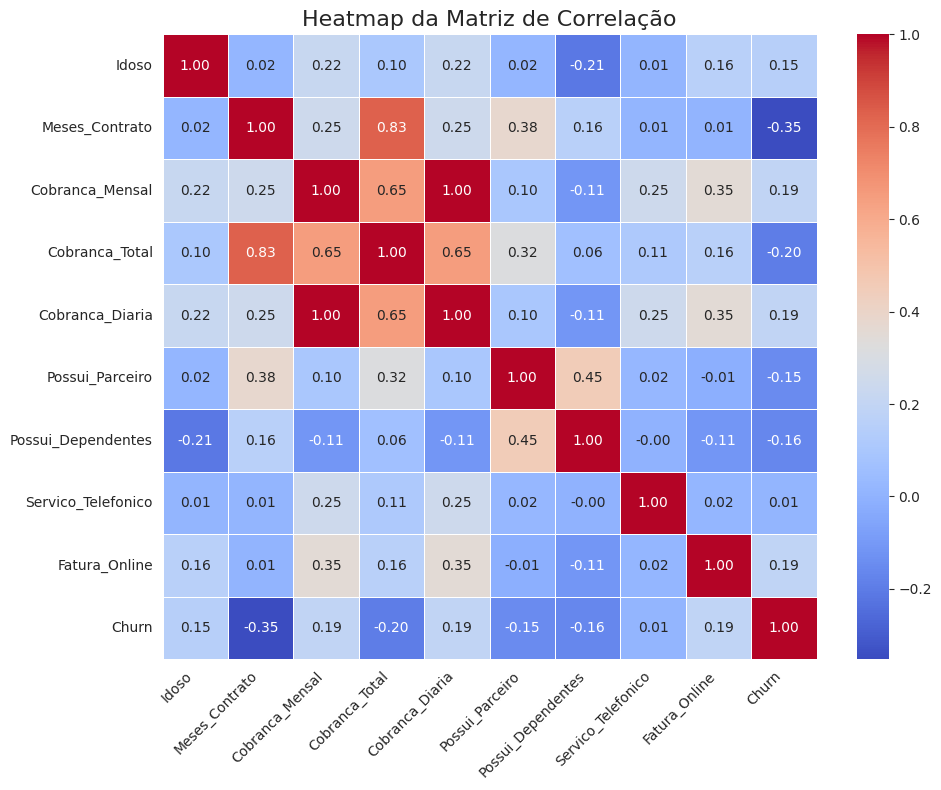


Gerando boxplot para Quantidade de Serviços Adicionais vs Churn...


<ipython-input-63-2953936eb6df>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn_Label", y="Qtd_Servicos_Adicionais", data=df, palette=["skyblue", "salmon"])


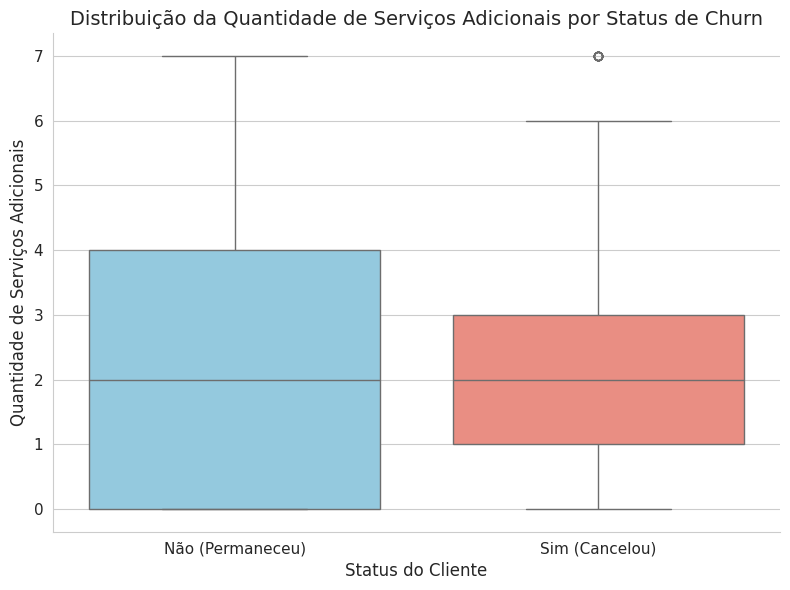


Geração de gráficos de correlação concluída.


In [63]:

# 1. Gerar Heatmap da Matriz de Correlação
print("Gerando heatmap da matriz de correlação...")
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Heatmap da Matriz de Correlação", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. Gerar Boxplot para Qtd_Servicos_Adicionais vs Churn
print("\nGerando boxplot para Quantidade de Serviços Adicionais vs Churn...")

# Mapear Churn para rótulos claros se ainda não existir (deveria existir do passo anterior, mas por segurança)
if "Churn_Label" not in df.columns:
      df["Churn_Label"] = df["Churn"].map({0: "Não (Permaneceu)", 1: "Sim (Cancelou)"})

plt.figure(figsize=(8, 6))
sns.boxplot(x="Churn_Label", y="Qtd_Servicos_Adicionais", data=df, palette=["skyblue", "salmon"])
plt.title("Distribuição da Quantidade de Serviços Adicionais por Status de Churn", fontsize=14)
plt.xlabel("Status do Cliente", fontsize=12)
plt.ylabel("Quantidade de Serviços Adicionais", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
sns.despine()
plt.tight_layout()
plt.show()
print("\nGeração de gráficos de correlação concluída.")


# Análise de Correlação - Telecom X Churn

Esta seção detalha a análise de correlação realizada para identificar variáveis com maior associação linear com a evasão de clientes (Churn).

## 1. Correlação entre Variáveis Numéricas e Churn

Calculamos a matriz de correlação de Pearson entre todas as variáveis numéricas do dataset (incluindo as binárias 0/1). O heatmap abaixo visualiza a matriz completa, enquanto a tabela subsequente destaca as correlações diretas com a variável `Churn`.

![Heatmap da Matriz de Correlação](correlation_heatmap.png)
*Figura 8: Heatmap da Matriz de Correlação entre variáveis numéricas.*

**Correlações com Churn (Ordenadas):**

| Variável             | Correlação com Churn |
|:-------------------|---------------------:|
| Churn              |                1.000 |
| Cobranca_Mensal    |                0.193 |
| Cobranca_Diaria    |                0.193 |
| Fatura_Online      |                0.192 |
| Idoso              |                0.151 |
| Servico_Telefonico |                0.012 |
| Possui_Parceiro    |               -0.150 |
| Possui_Dependentes |               -0.164 |
| Cobranca_Total     |               -0.198 |
| Meses_Contrato     |               -0.352 |

**Insights:**

*   **Correlações Positivas (Maior valor -> Maior Churn):** `Cobranca_Mensal`, `Cobranca_Diaria`, `Fatura_Online` e `Idoso` mostram correlações positivas (embora fracas a moderadas) com o Churn. Isso reforça as observações anteriores de que custos mensais mais altos e ser idoso estão associados a maior evasão.
*   **Correlações Negativas (Maior valor -> Menor Churn):** `Meses_Contrato` apresenta a correlação negativa mais forte (-0.352), confirmando que quanto maior o tempo de contrato, menor a chance de churn. `Cobranca_Total`, `Possui_Dependentes` e `Possui_Parceiro` também têm correlações negativas, indicando que clientes com maior gasto acumulado (reflexo do tempo), com dependentes ou parceiros tendem a cancelar menos.

## 2. Análise da Quantidade de Serviços Adicionais

Criamos uma nova variável, `Qtd_Servicos_Adicionais`, contando quantos dos seguintes serviços um cliente assina: Multiplas_Linhas, Seguranca_Online, Backup_Online, Protecao_Dispositivo, Suporte_Tecnico, Streaming_TV, Streaming_Filmes.

*   **Correlação com Churn:** A correlação de Pearson entre `Qtd_Servicos_Adicionais` e `Churn` foi de **-0.070**. É uma correlação negativa muito fraca, sugerindo que apenas a quantidade de serviços, por si só, não tem uma forte relação linear direta com a decisão de cancelar.
*   **Média de Serviços por Grupo:** Clientes que **permaneceram (Churn=0)** têm, em média, **2.55** serviços adicionais, enquanto os que **cancelaram (Churn=1)** têm, em média, **2.22** serviços.

![Boxplot Qtd Serviços por Churn](boxplot_qtd_servicos_by_churn.png)
*Figura 9: Distribuição da Quantidade de Serviços Adicionais por Status de Churn.*

**Insights:**

*   Embora a correlação linear seja fraca, a média ligeiramente menor de serviços para quem cancela e a visualização do boxplot sugerem que clientes com menos serviços adicionais *podem* ter uma tendência um pouco maior a cancelar. No entanto, a análise anterior (Figura 5, por exemplo) mostrou que *quais* serviços são contratados (especialmente segurança e suporte) é mais impactante do que apenas a quantidade total.

## Conclusão da Análise de Correlação

A análise de correlação reforça a importância do **tempo de contrato** (correlação negativa mais forte) e da **cobrança mensal** (correlação positiva mais forte) como fatores associados ao churn. A quantidade de serviços adicionais, isoladamente, tem uma correlação fraca, mas a análise categórica anterior indicou que a *presença de serviços específicos* (como suporte e segurança) é relevante.

Esses resultados são úteis para a seleção de variáveis (feature selection) em modelos preditivos e para confirmar os direcionamentos das recomendações estratégicas.

